In [32]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#Import dataset
df_clustering = pd.read_csv('data/df_incidents_poverty_house_data_preparation_final.csv')

In [34]:
#Show dataset
df_clustering.head()

latitude  longitude  avg_age_participants  males_ratio  \
0   39.8322   -86.2492                  19.0          1.0   
1   41.6645   -78.7856                  62.0          1.0   
2   42.4190   -83.0393                  24.0          1.0   
3   38.9647   -94.4654                  29.0          1.0   
4   34.3904  -117.3770                  19.0          1.0   

  state_congressional_district  povertyPercentage  killed_ratio  \
0                    indiana_7               12.3           0.0   
1               pennsylvania_5               10.5           1.0   
2                  michigan_14               11.0           0.0   
3                   missouri_5               11.9           0.0   
4                 california_8               11.0           1.0   

   injured_ratio  unharmed_ratio  candidate_winning_ratio  \
0            1.0             0.0                 0.547323   
1            0.0             0.0                 0.671644   
2            0.5             0.5                 0.785066   
3            0.0             0.0                 0.588294   
4            0.0             0.0                 0.599672   

   age_poverty_product  males_in_month_ratio  killed_in_month_ratio  \
0                233.7              0.009434                    0.0   
1                651.0              0.100000                    0.5   
2                264.0              0.032787                    0.0   
3                345.1              0.014286                    0.0   
4                209.0              0.047619                    0.2   

   injured_in_month_ratio  unharmed_in_month_ratio  
0                0.031250                 0.000000  
1                0.000000                 0.000000  
2                0.041667                 0.047619  
3                0.000000                 0.000000  
4                0.000000                 0.000000

In [35]:
#Show dataset info
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98321 entries, 0 to 98320
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   latitude                      98321 non-null  float64
 1   longitude                     98321 non-null  float64
 2   avg_age_participants          98321 non-null  float64
 3   males_ratio                   98321 non-null  float64
 4   state_congressional_district  98321 non-null  object 
 5   povertyPercentage             98321 non-null  float64
 6   killed_ratio                  98321 non-null  float64
 7   injured_ratio                 98321 non-null  float64
 8   unharmed_ratio                98321 non-null  float64
 9   candidate_winning_ratio       98321 non-null  float64
 10  age_poverty_product           98321 non-null  float64
 11  males_in_month_ratio          98321 non-null  float64
 12  killed_in_month_ratio         98321 non-null  float64
 13  i

## K-Means Clustering

In [36]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

In [37]:
# Select features for clustering
features = ['latitude', 'longitude', 'avg_age_participants', 'males_ratio', 'povertyPercentage', 
            'killed_ratio', 'injured_ratio', 'unharmed_ratio', 'candidate_winning_ratio', 
            'age_poverty_product', 'males_in_month_ratio', 'killed_in_month_ratio', 'injured_in_month_ratio', 
            'unharmed_in_month_ratio']

#Print length of features
print(len(features))

14


In [38]:
# Extract features from the dataset
X = df_clustering[features]

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Normalization of X

In [40]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [41]:
min_max_scaler = MinMaxScaler()
X_normalized_minmax = min_max_scaler.fit_transform(X)

In [42]:
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

In [43]:
X_normalized_minmax = pd.DataFrame(X_normalized_minmax, columns=X.columns)

In [44]:
X_normalized_minmax.head()

latitude  longitude  avg_age_participants  males_ratio  povertyPercentage  \
0  0.450468   0.718930              0.225806          1.0           0.403101   
1  0.504484   0.829490              0.919355          1.0           0.263566   
2  0.526726   0.766479              0.306452          1.0           0.302326   
3  0.424894   0.597221              0.387097          1.0           0.372093   
4  0.290045   0.257825              0.225806          1.0           0.302326   

   killed_ratio  injured_ratio  unharmed_ratio  candidate_winning_ratio  \
0           0.0            1.0            0.00                 0.375620   
1           1.0            0.0            0.00                 0.547097   
2           0.0            0.5            0.75                 0.703540   
3           0.0            0.0            0.00                 0.432132   
4           1.0            0.0            0.00                 0.447826   

   age_poverty_product  males_in_month_ratio  killed_in_month_ratio  \
0             0.131299              0.044811                    0.0   
1             0.475464              0.475000                    1.0   
2             0.156289              0.155738                    0.0   
3             0.223175              0.067857                    0.0   
4             0.110928              0.226190                    0.4   

   injured_in_month_ratio  unharmed_in_month_ratio  
0                0.078125                 0.000000  
1                0.000000                 0.000000  
2                0.104167                 0.095238  
3                0.000000                 0.000000  
4                0.000000                 0.000000

## Determining Best Value of K for K-means

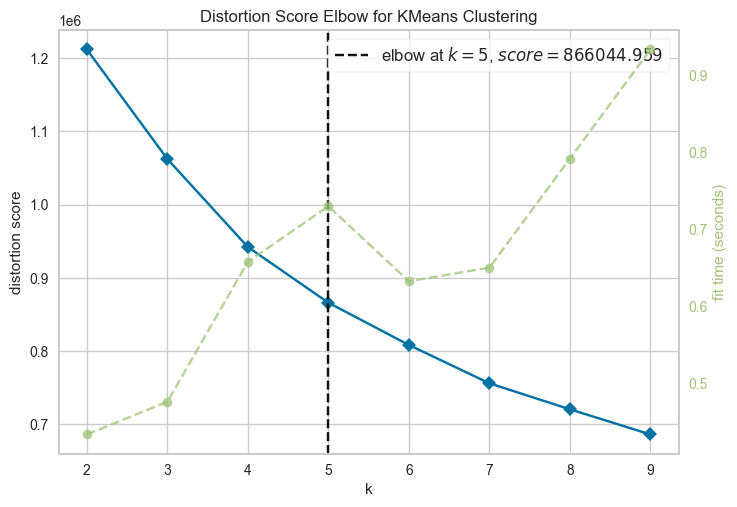

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
model = KMeans(random_state=123, n_init=10, max_iter=100)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X_normalized)
visualizer.show()

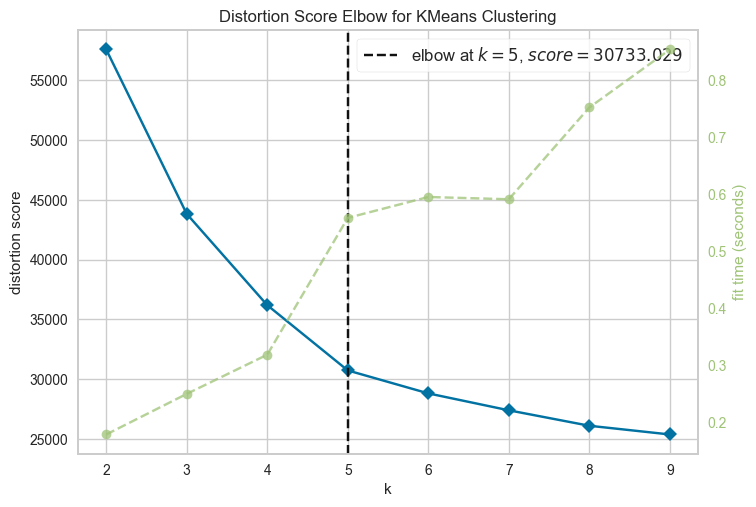

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
# Use the Elbow method to find the optimal number of clusters (k) with normalized data
model = KMeans(random_state=123, n_init=10, max_iter=100)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X_normalized_minmax)
visualizer.show()

The graph above shows the reduction of a distortion score as the number of clusters increases. The underlying algorithm suggests 5 clusters. A choice of 5 or 6 clusters seems to be fair.

Another way to choose the best number of clusters is to plot the silhouette score in a function of number of clusters.

In [47]:
from sklearn.metrics import silhouette_score

In [48]:
X_normalized.head()

latitude  longitude  avg_age_participants  males_ratio  povertyPercentage  \
0  0.465291   0.302253             -1.088989     0.598883          -0.032174   
1  0.842689   0.860630              2.833162     0.598883          -0.712246   
2  0.998093   0.542396             -0.632925     0.598883          -0.523337   
3  0.286613  -0.312428             -0.176861     0.598883          -0.183301   
4 -0.655554  -2.026522             -1.088989     0.598883          -0.523337   

   killed_ratio  injured_ratio  unharmed_ratio  candidate_winning_ratio  \
0     -0.523459       1.603257       -0.347054                -1.178584   
1      2.397305      -0.739698       -0.347054                -0.170840   
2     -0.523459       0.431779        2.788069                 0.748548   
3     -0.523459      -0.739698       -0.347054                -0.846476   
4      2.397305      -0.739698       -0.347054                -0.754243   

   age_poverty_product  males_in_month_ratio  killed_in_month_ratio  \
0            -0.914937             -0.592849              -0.405602   
1             1.622735              2.149943               6.271730   
2            -0.730677              0.114394              -0.405602   
3            -0.237495             -0.445913              -0.405602   
4            -1.065141              0.563586               2.265331   

   injured_in_month_ratio  unharmed_in_month_ratio  
0                0.056744                -0.272547  
1               -0.474442                -0.272547  
2                0.233806                 0.508101  
3               -0.474442                -0.272547  
4               -0.474442                -0.272547

In [49]:
X_normalized_minmax.head()

latitude  longitude  avg_age_participants  males_ratio  povertyPercentage  \
0  0.450468   0.718930              0.225806          1.0           0.403101   
1  0.504484   0.829490              0.919355          1.0           0.263566   
2  0.526726   0.766479              0.306452          1.0           0.302326   
3  0.424894   0.597221              0.387097          1.0           0.372093   
4  0.290045   0.257825              0.225806          1.0           0.302326   

   killed_ratio  injured_ratio  unharmed_ratio  candidate_winning_ratio  \
0           0.0            1.0            0.00                 0.375620   
1           1.0            0.0            0.00                 0.547097   
2           0.0            0.5            0.75                 0.703540   
3           0.0            0.0            0.00                 0.432132   
4           1.0            0.0            0.00                 0.447826   

   age_poverty_product  males_in_month_ratio  killed_in_month_ratio  \
0             0.131299              0.044811                    0.0   
1             0.475464              0.475000                    1.0   
2             0.156289              0.155738                    0.0   
3             0.223175              0.067857                    0.0   
4             0.110928              0.226190                    0.4   

   injured_in_month_ratio  unharmed_in_month_ratio  
0                0.078125                 0.000000  
1                0.000000                 0.000000  
2                0.104167                 0.095238  
3                0.000000                 0.000000  
4                0.000000                 0.000000

c:\Users\ASUS\.virtualenvs\data-mining-2023-24\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\.virtualenvs\data-mining-2023-24\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\.virtualenvs\data-mining-2023-24\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\.virtualenvs\data-mining-2023-24\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarni

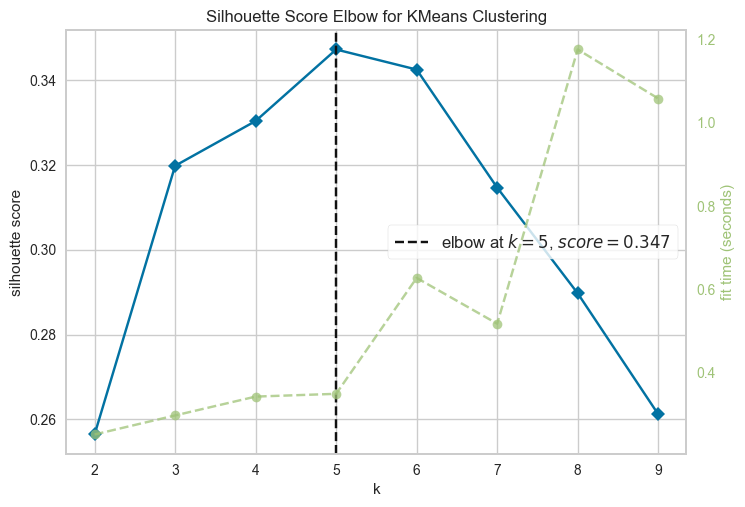

In [50]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_normalized_minmax)
visualizer.show()
plt.show()

c:\Users\ASUS\.virtualenvs\data-mining-2023-24\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\.virtualenvs\data-mining-2023-24\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\.virtualenvs\data-mining-2023-24\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\.virtualenvs\data-mining-2023-24\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarni

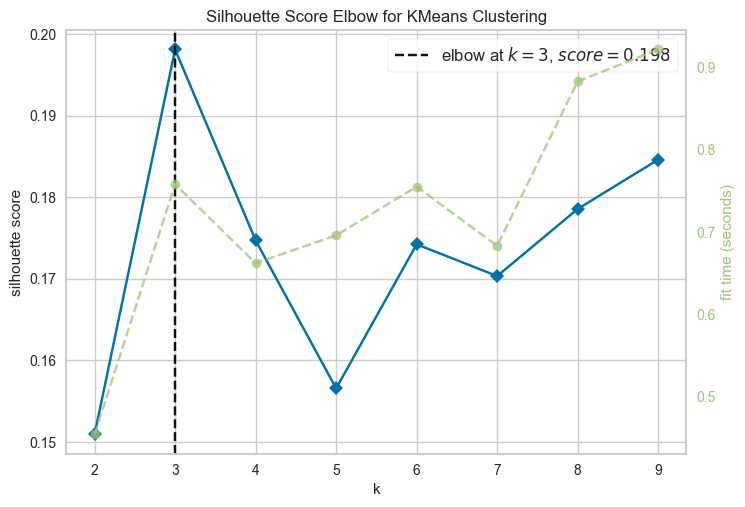

In [51]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_normalized)
visualizer.show()
plt.show()

Using the standard scaler gives a lower sihouette score so we use the the minmax scaler

### Setting Optimal K value

In [52]:
k_optimal = 5

## Characterization of Obtained Clusters

c:\Users\ASUS\.virtualenvs\data-mining-2023-24\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 1
	latitude: count    29645.000000
mean         0.402515
std          0.132617
min          0.000153
25%          0.310307
50%          0.438523
75%          0.507544
max          0.714866
Name: latitude, dtype: float64
	longitude: count    29645.000000
mean         0.682880
std          0.169970
min          0.153540
25%          0.660206
50%          0.698548
75%          0.781198
max          0.999636
Name: longitude, dtype: float64
	avg_age_participants: count    29645.000000
mean         0.386482
std          0.171974
min          0.080645
25%          0.258065
50%          0.338710
75%          0.483871
max          1.000000
Name: avg_age_participants, dtype: float64
	males_ratio: count    29645.000000
mean         0.897197
std          0.266858
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: males_ratio, dtype: float64
	povertyPercentage: count    29645.000000
mean         0.393102
std          0.198893


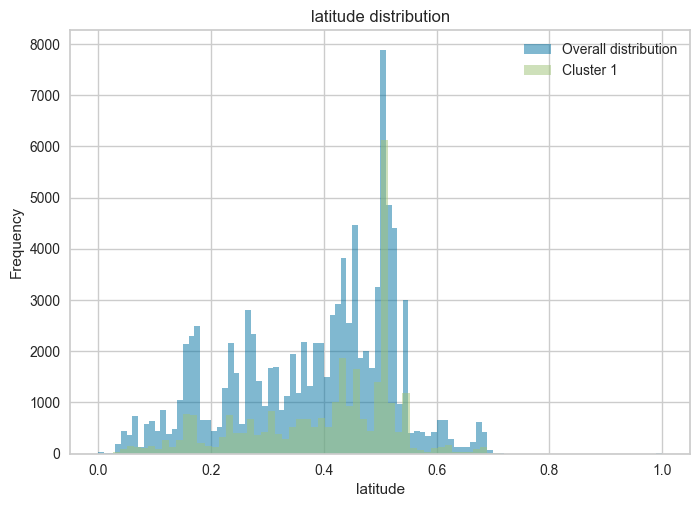

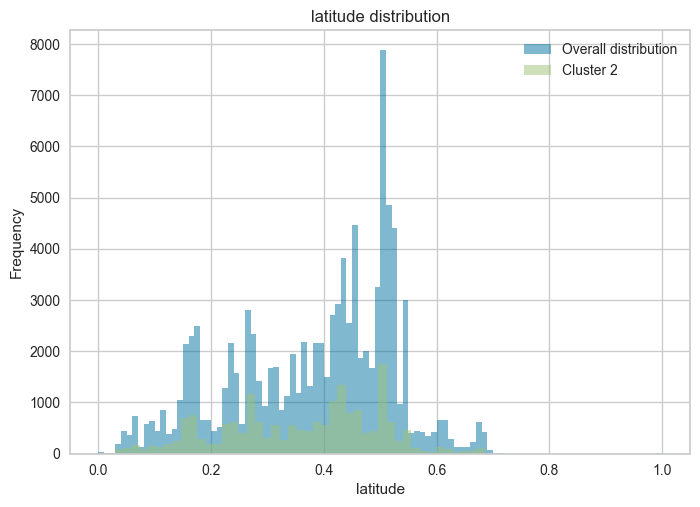

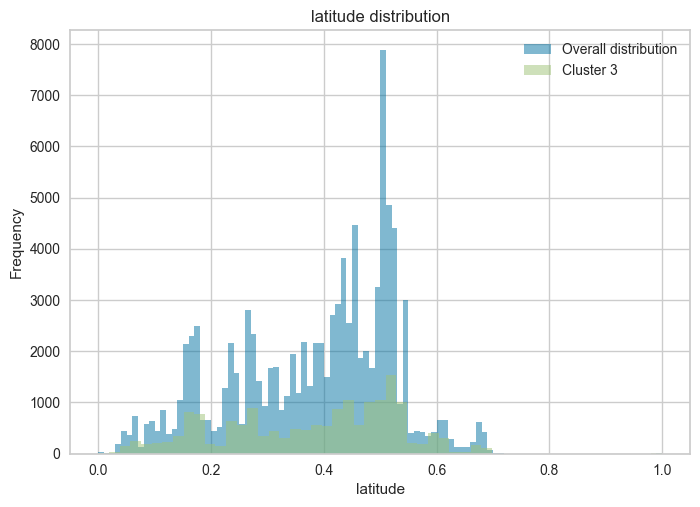

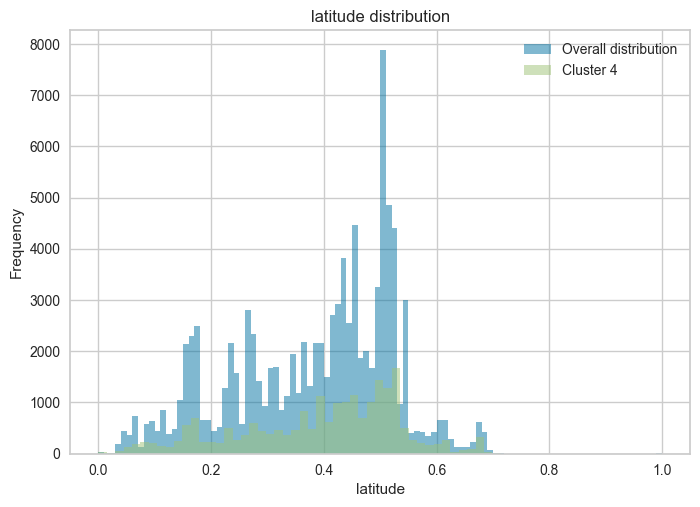

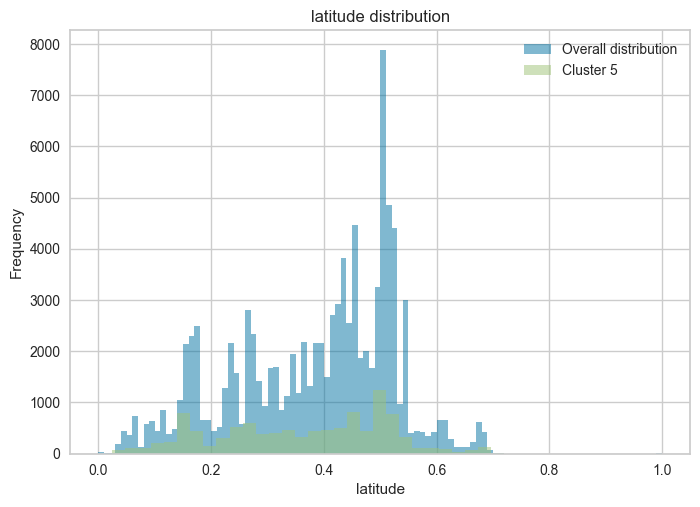

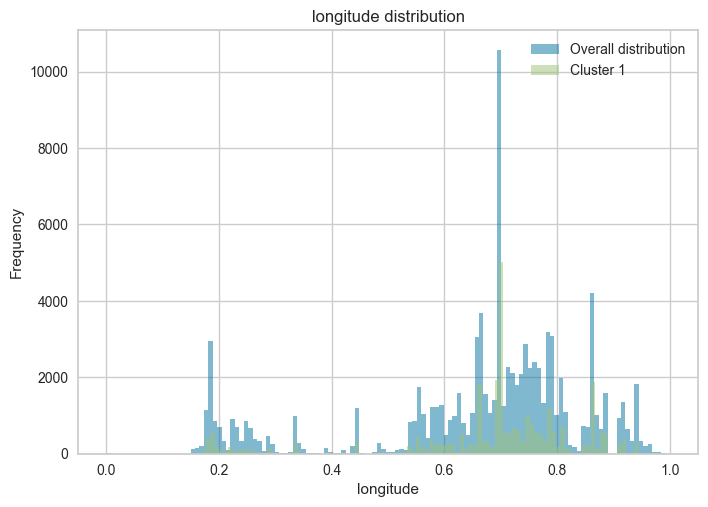

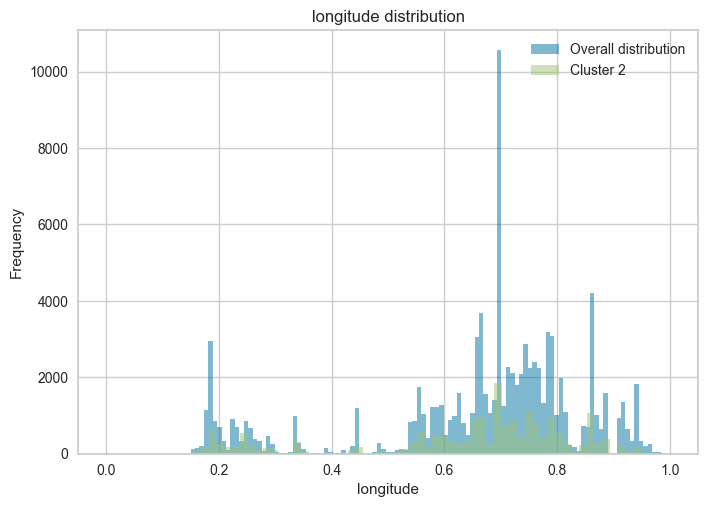

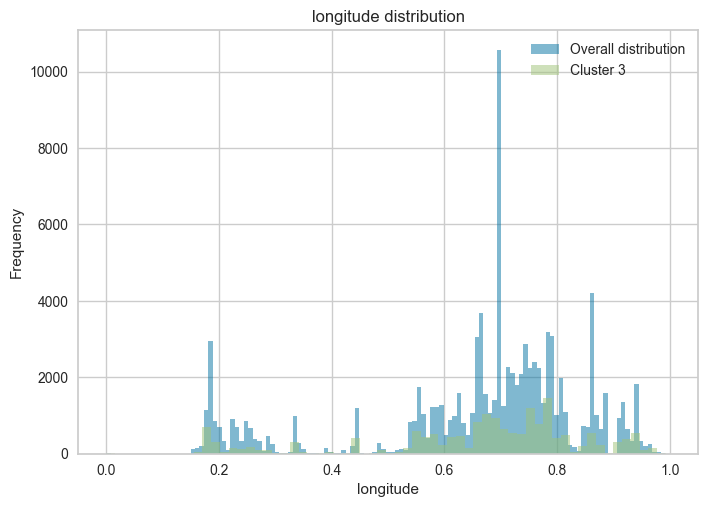

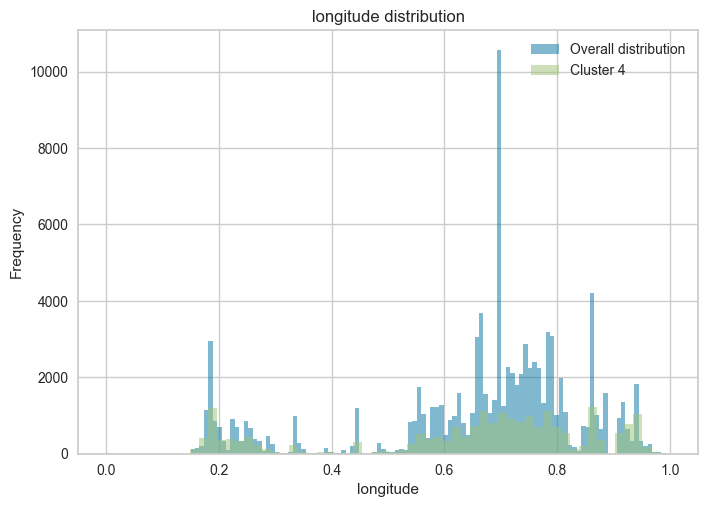

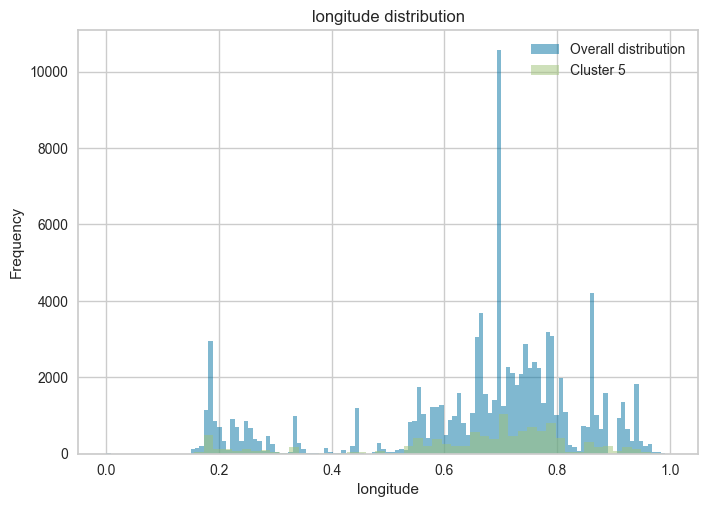

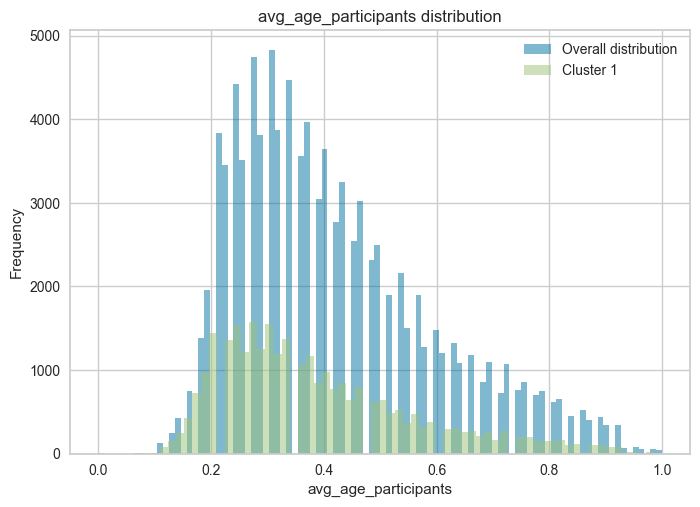

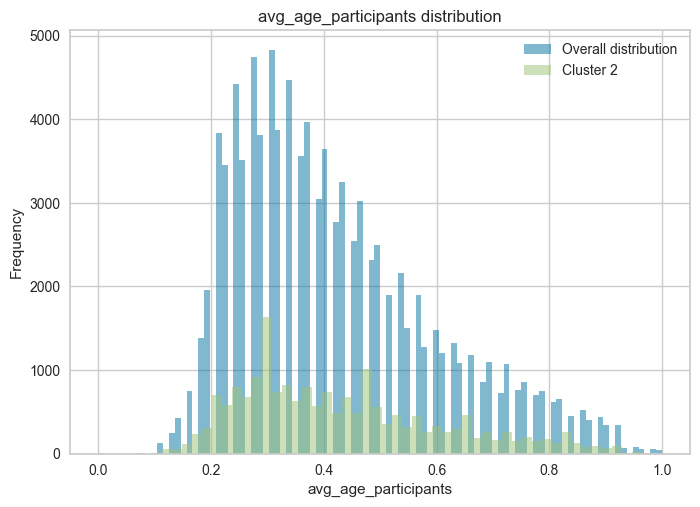

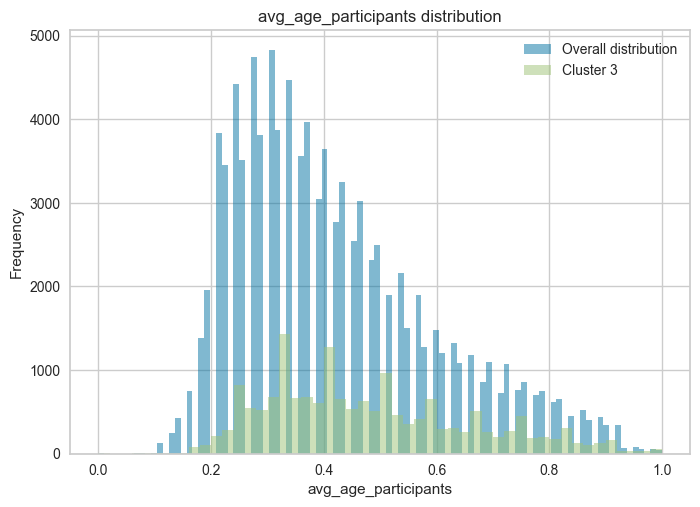

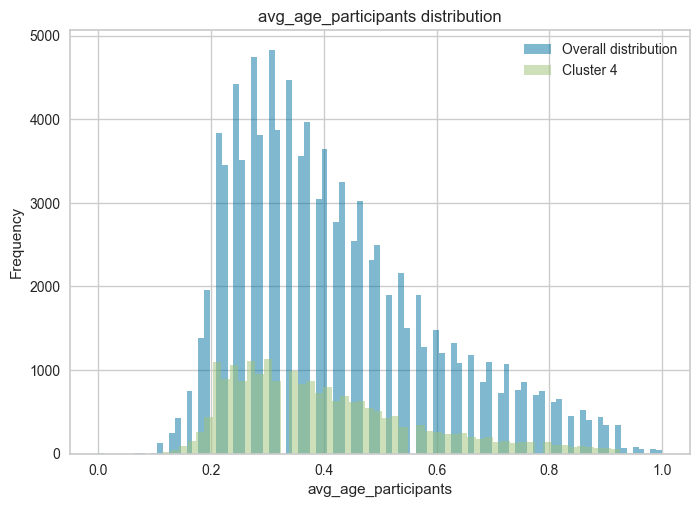

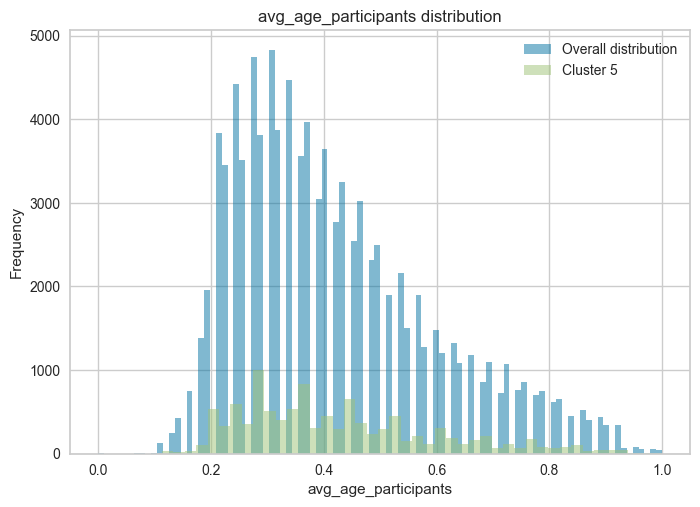

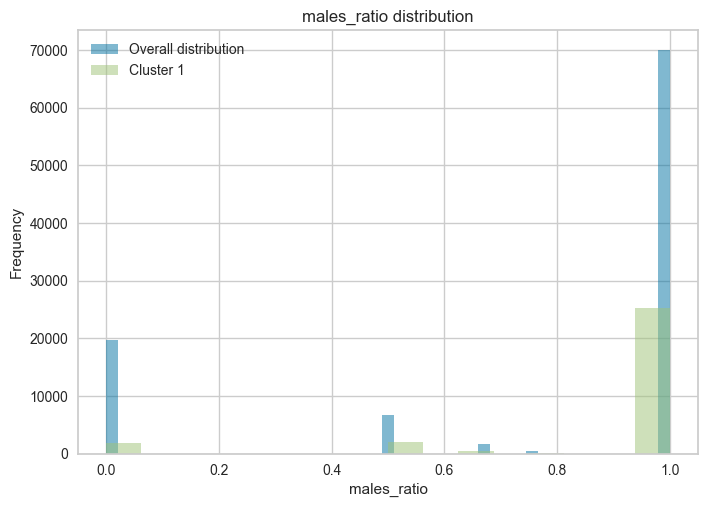

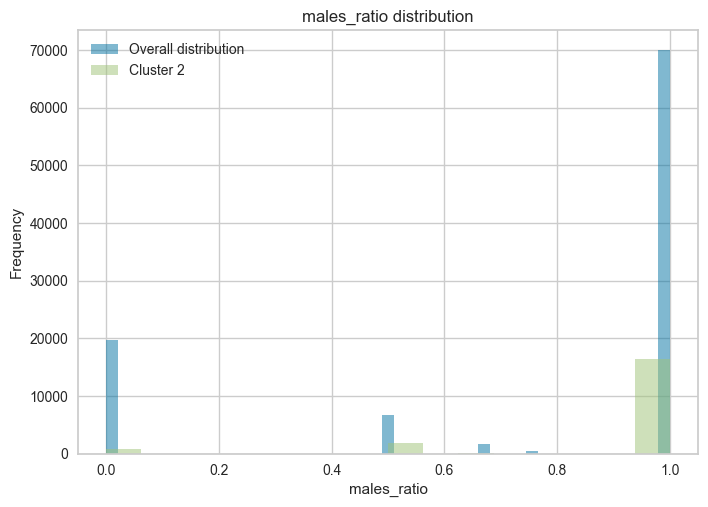

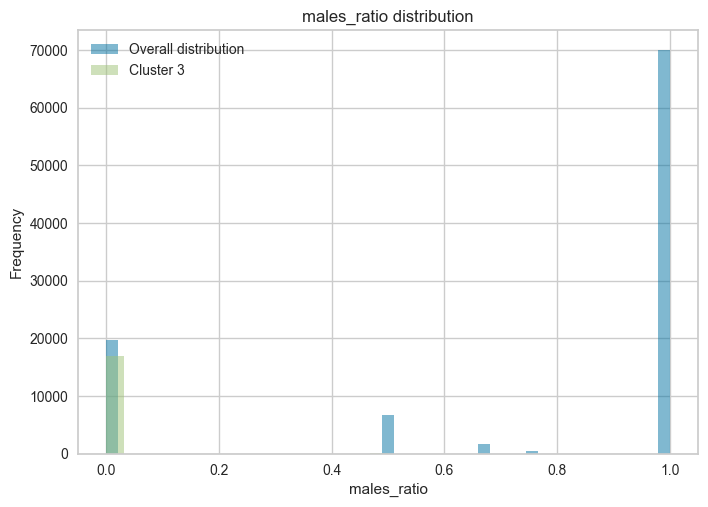

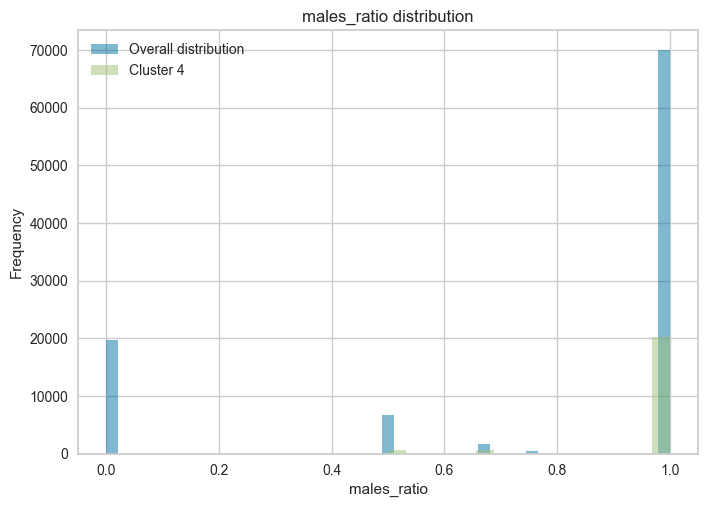

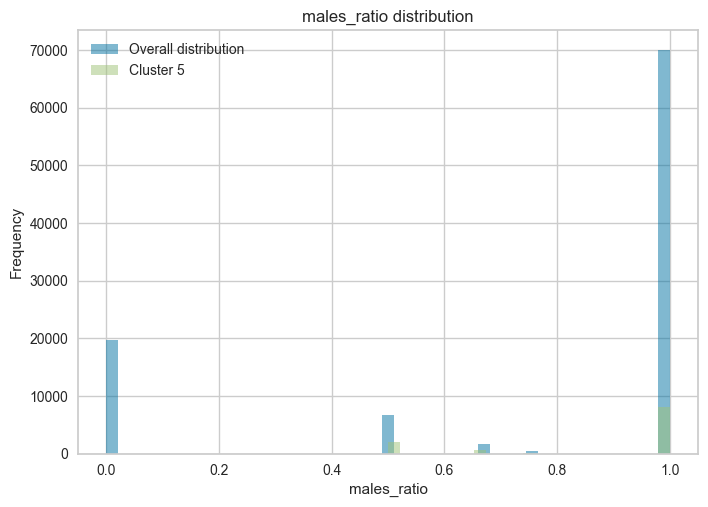

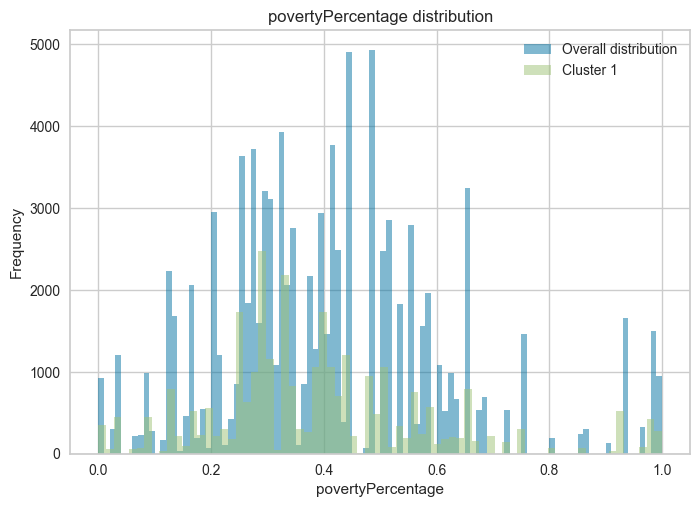

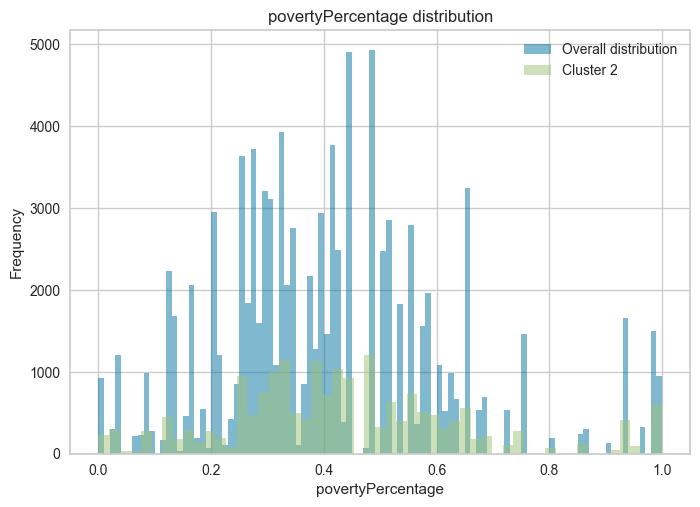

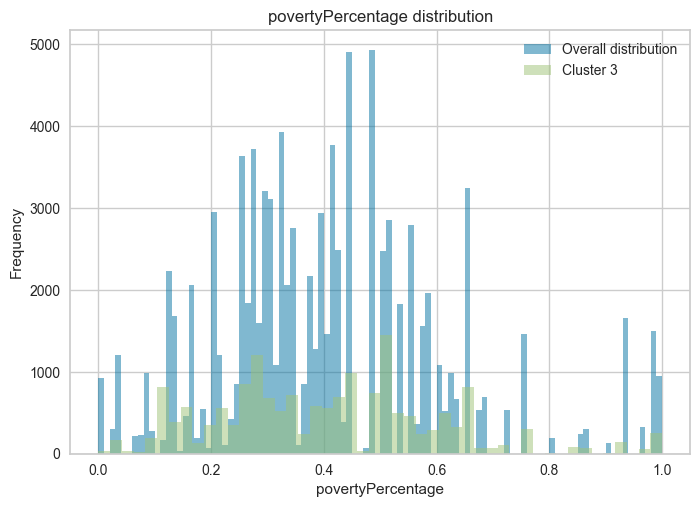

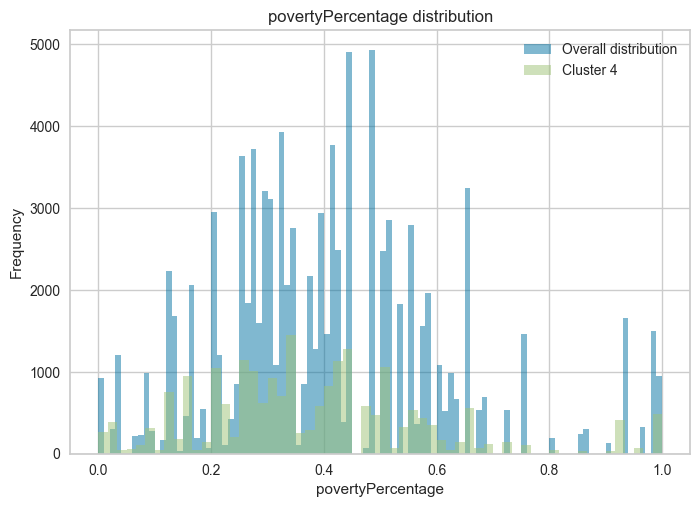

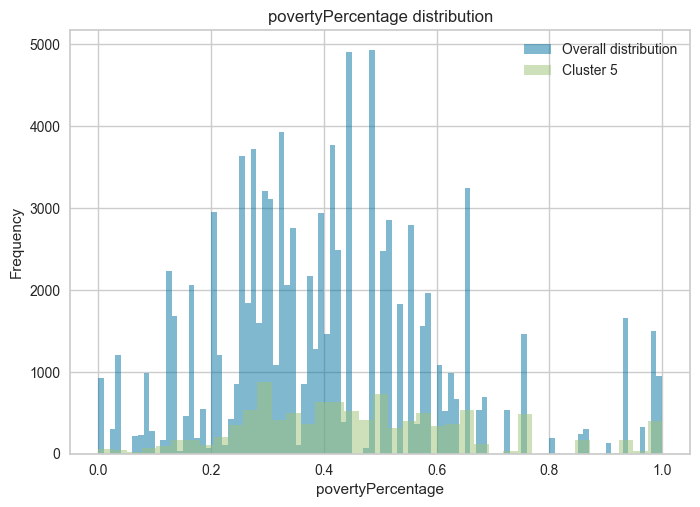

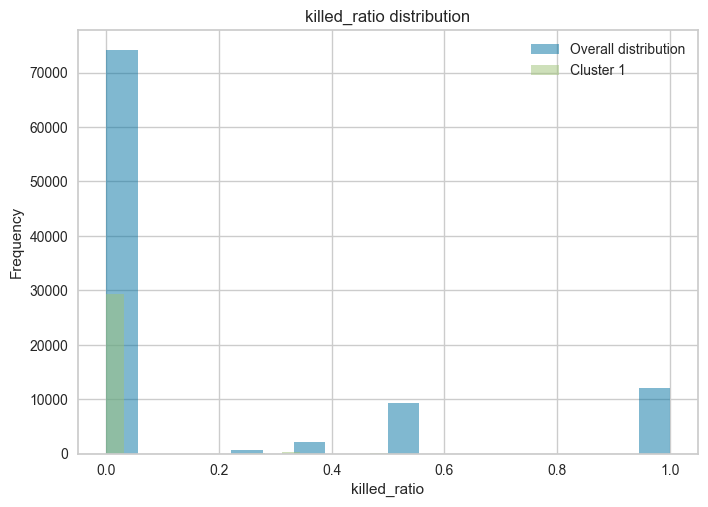

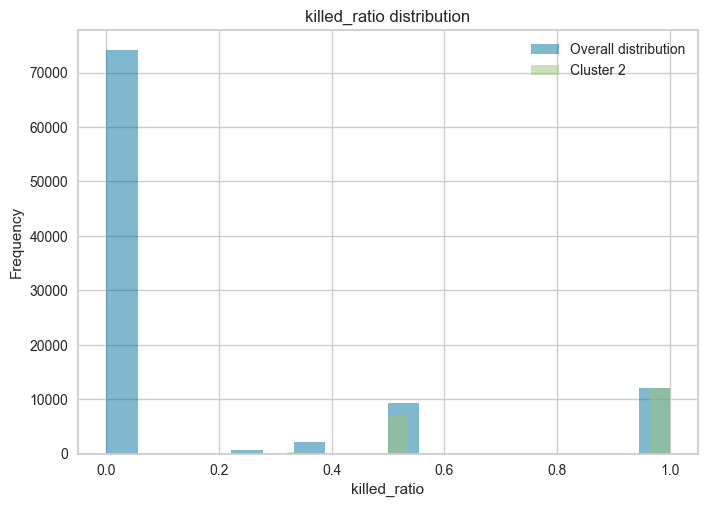

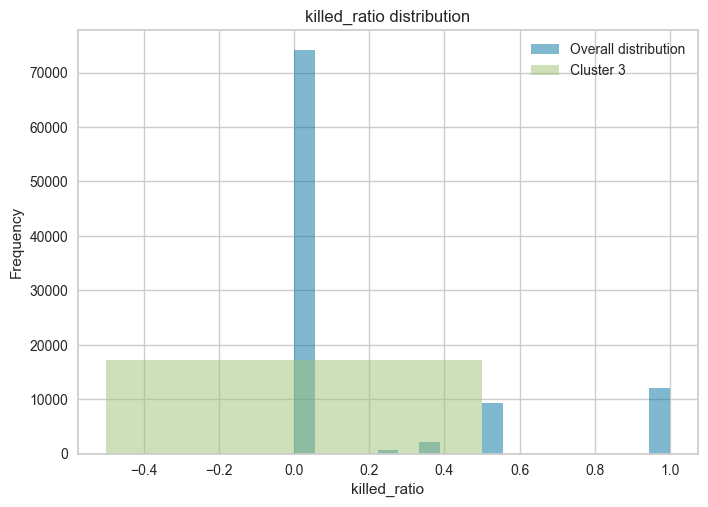

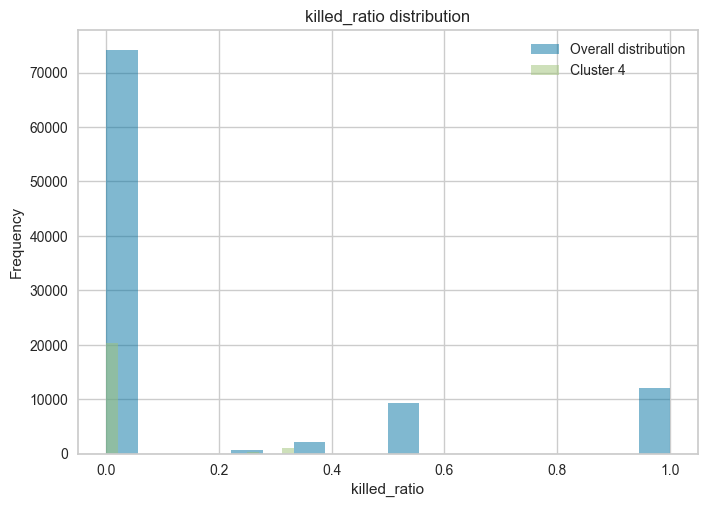

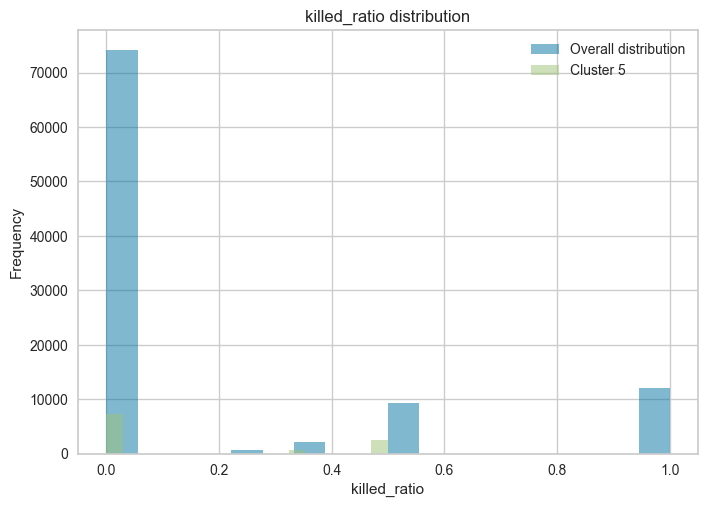

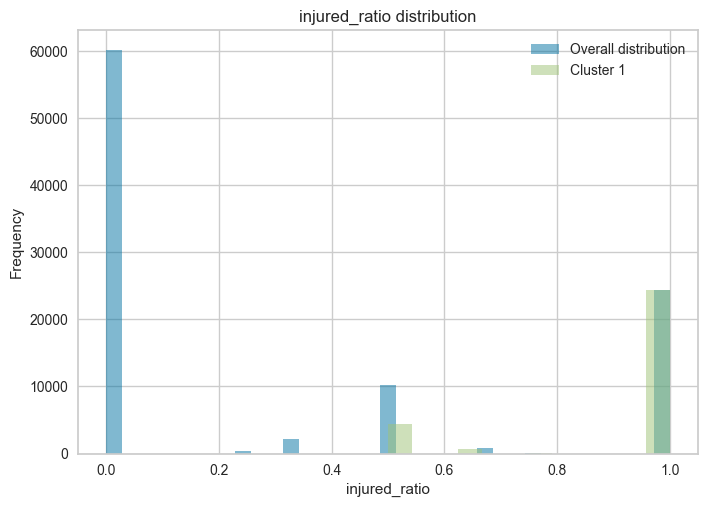

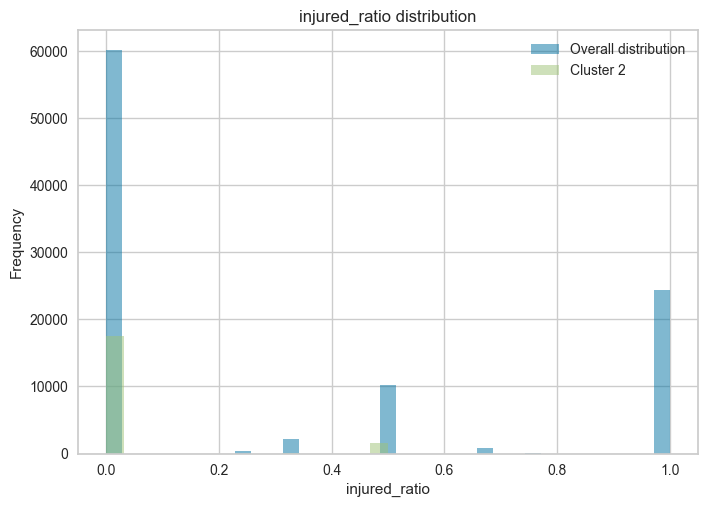

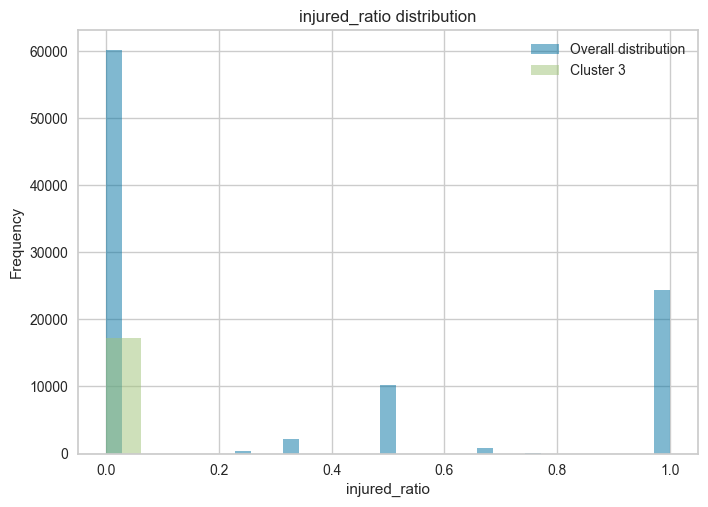

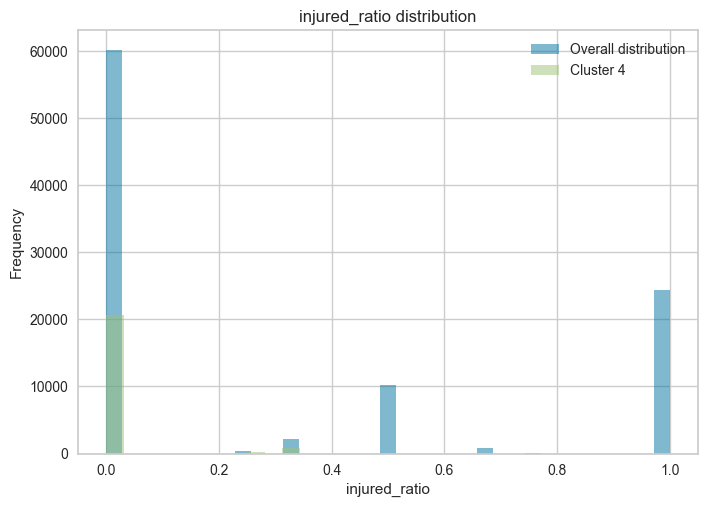

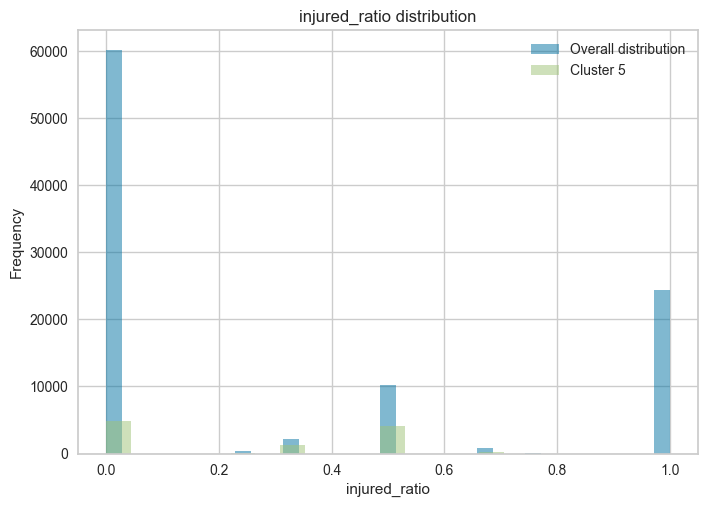

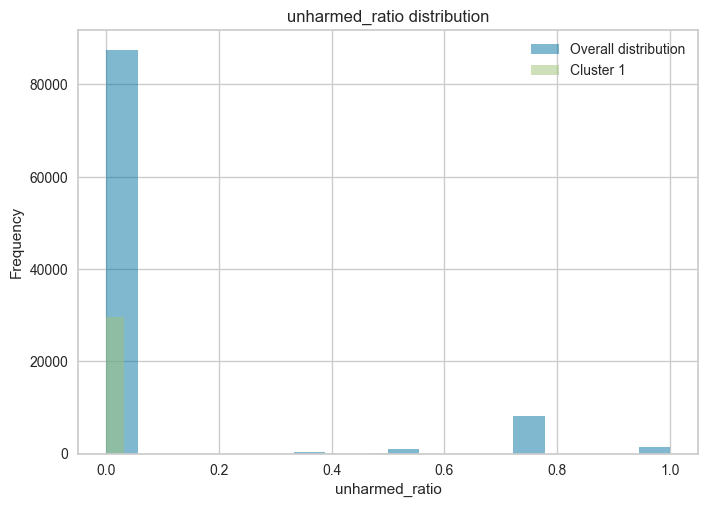

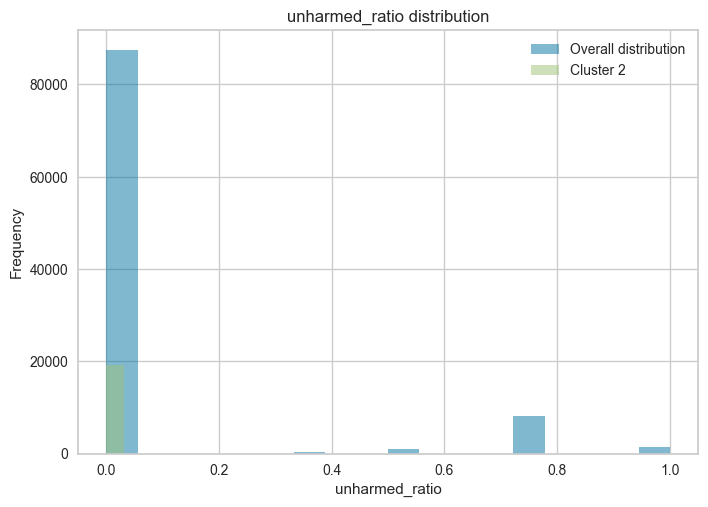

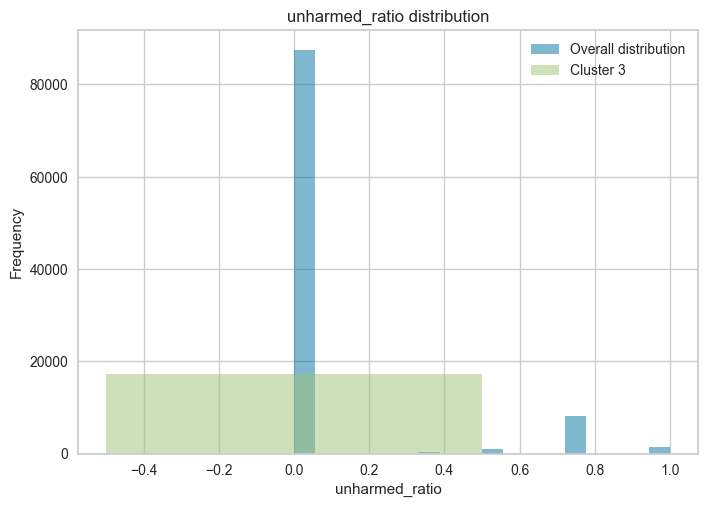

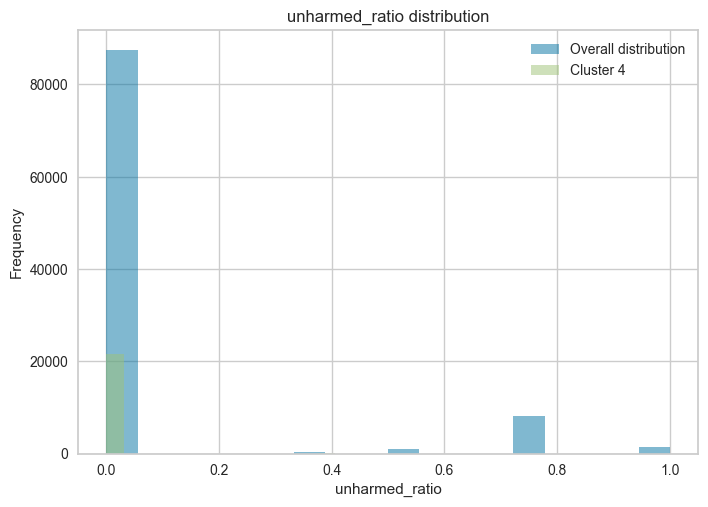

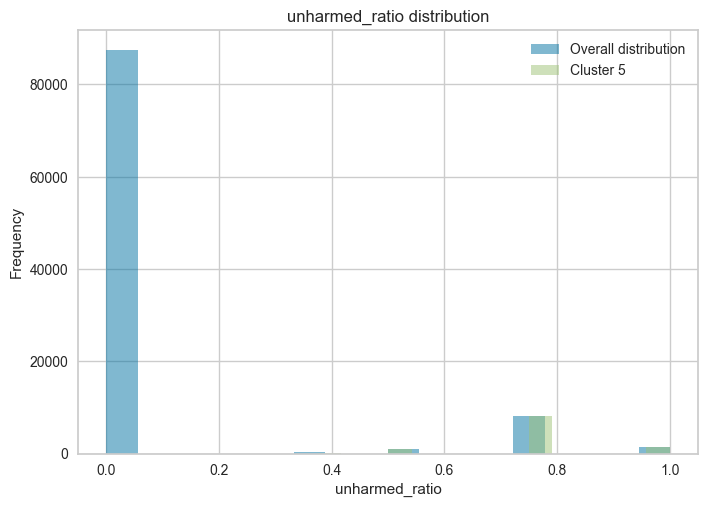

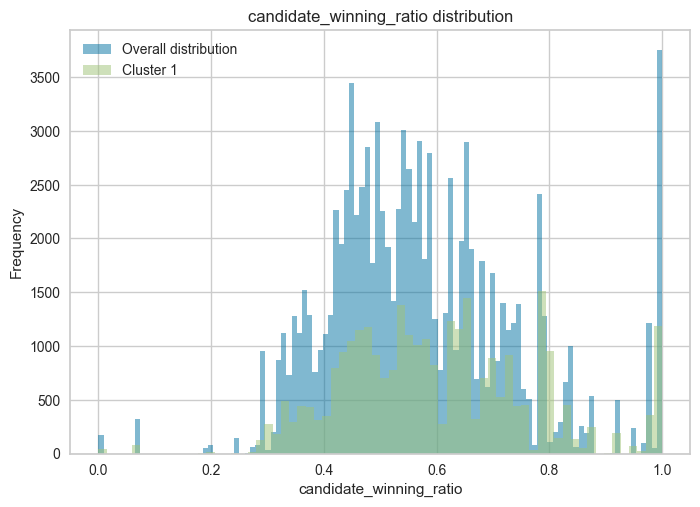

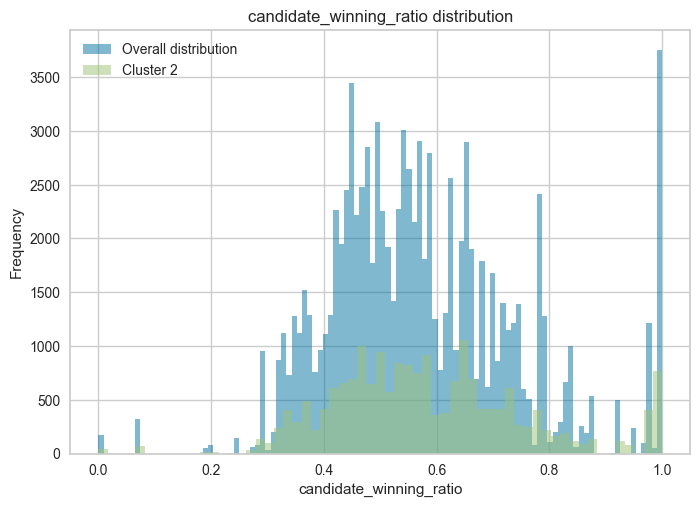

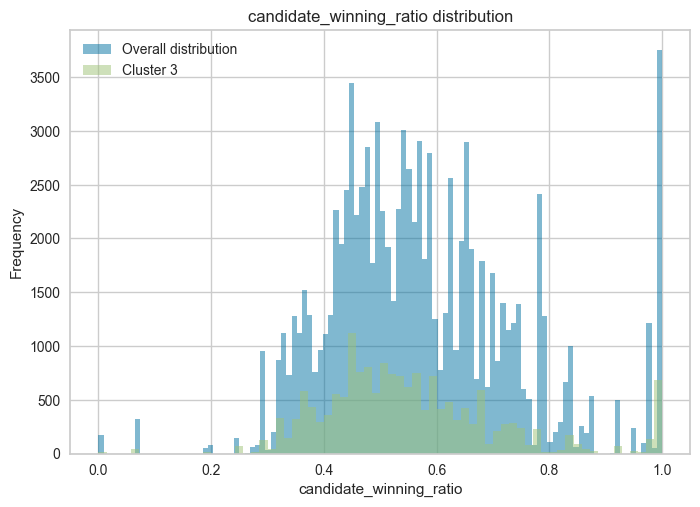

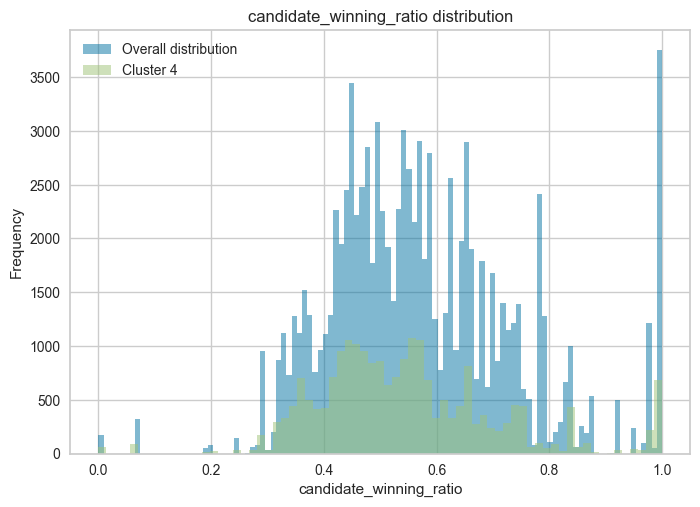

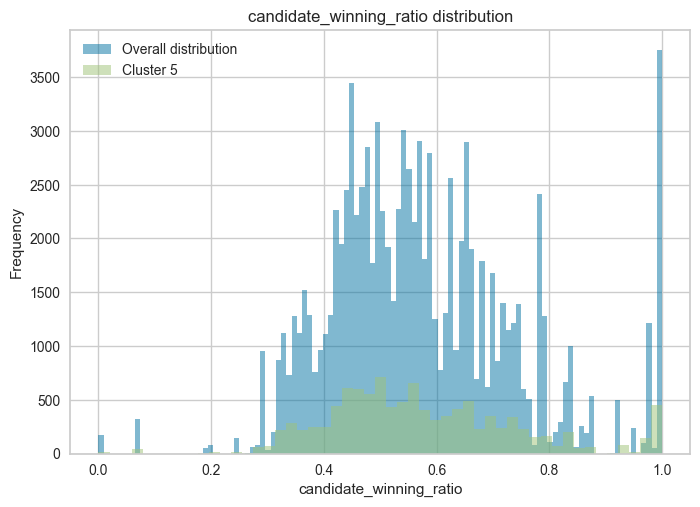

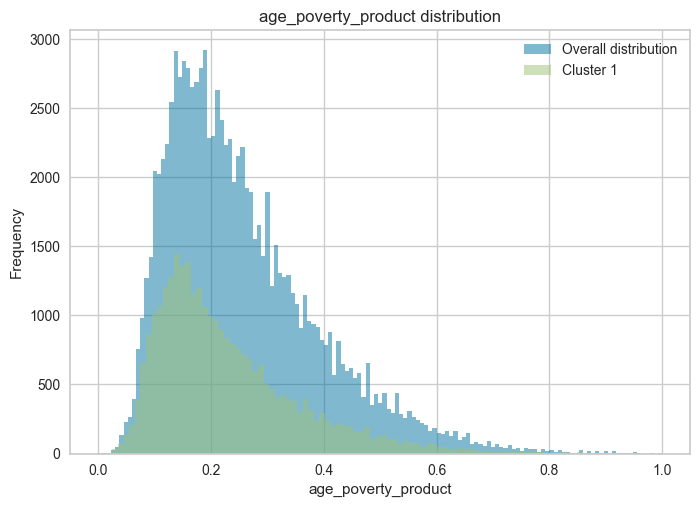

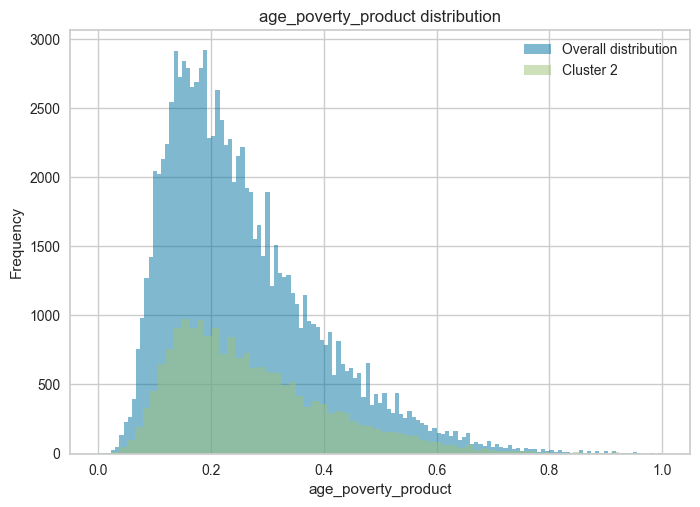

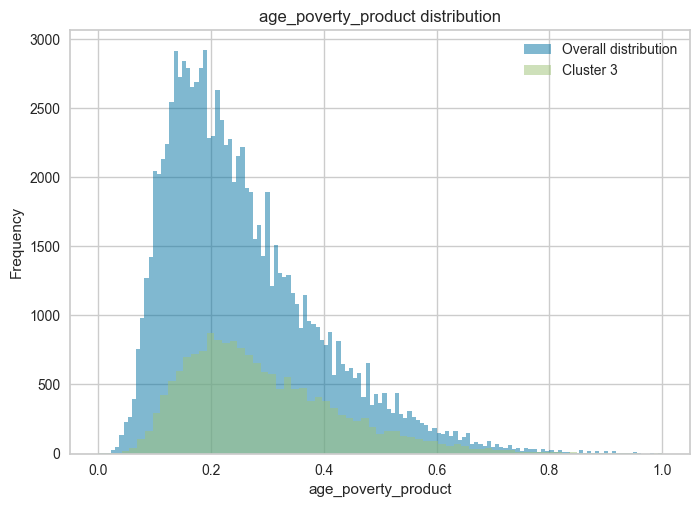

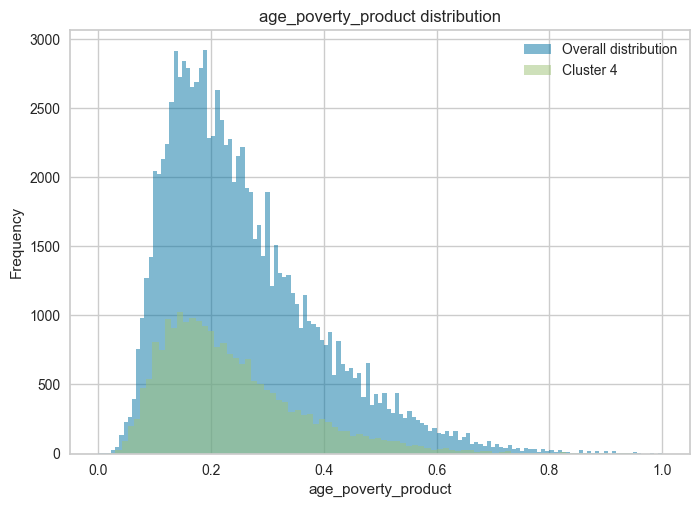

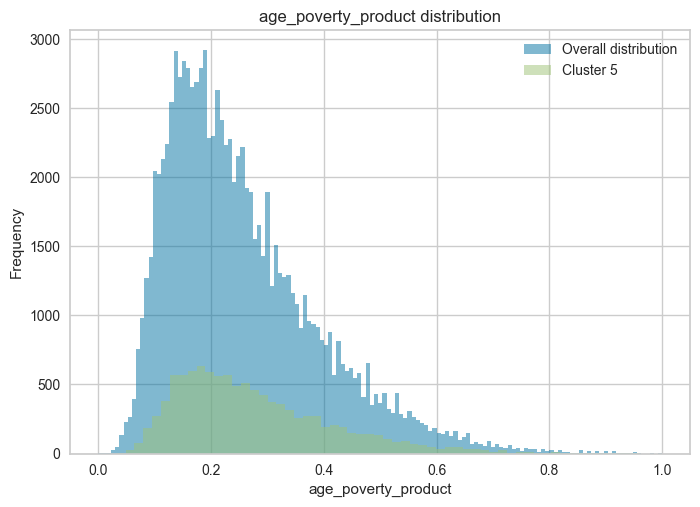

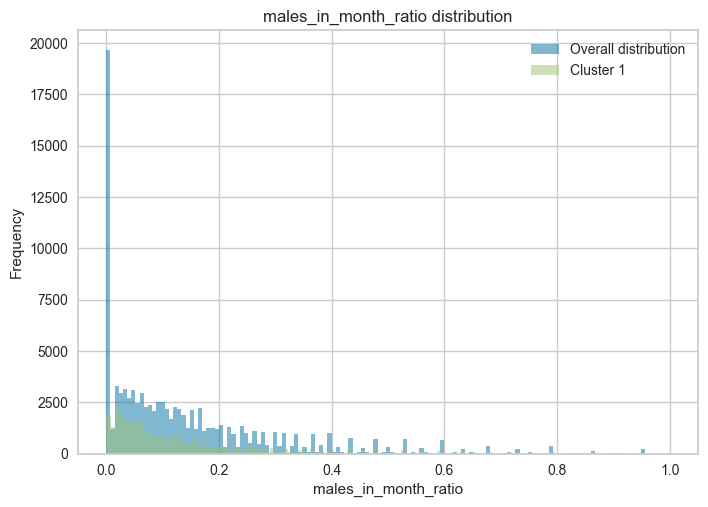

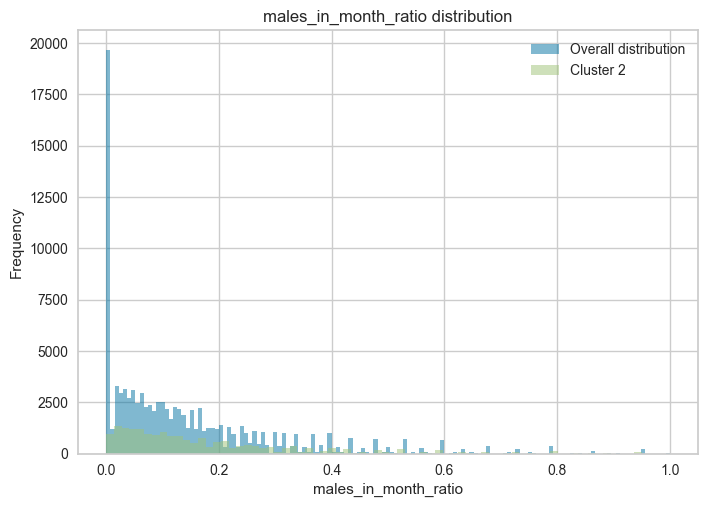

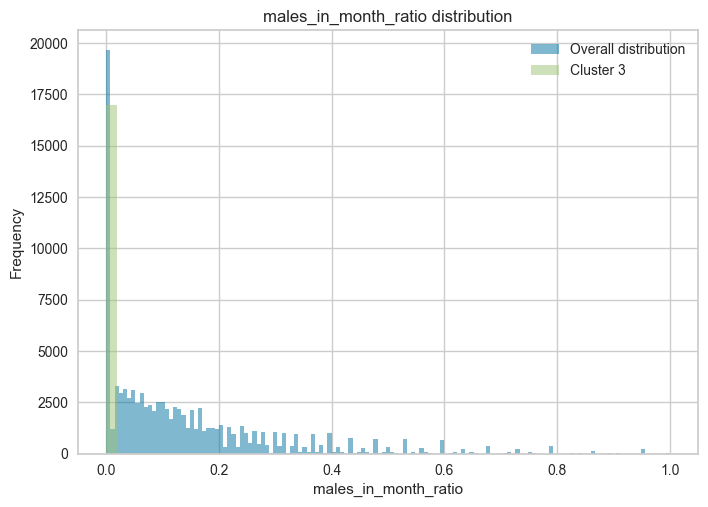

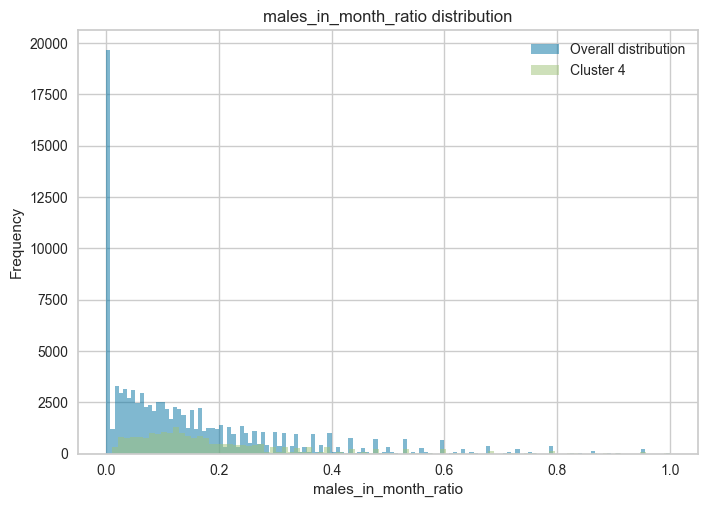

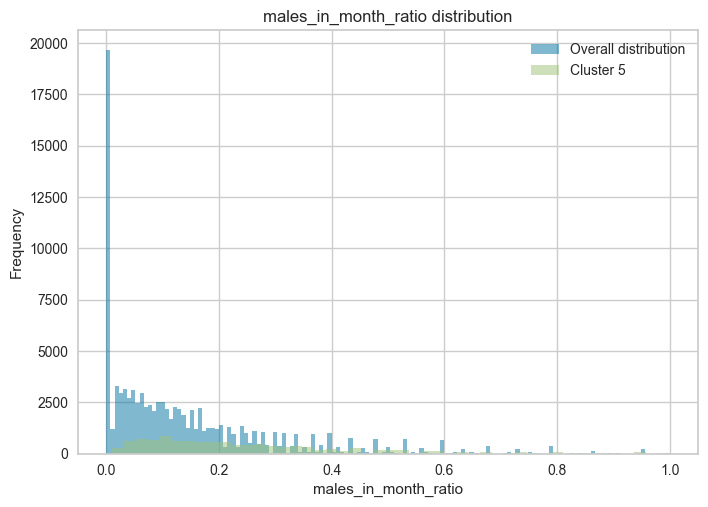

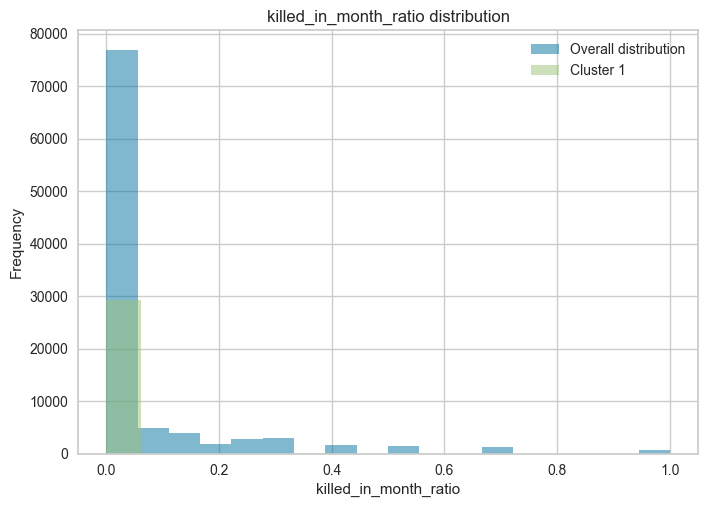

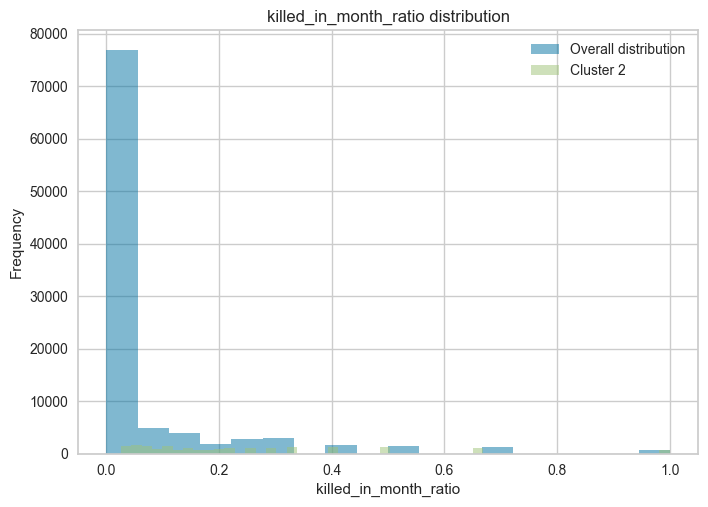

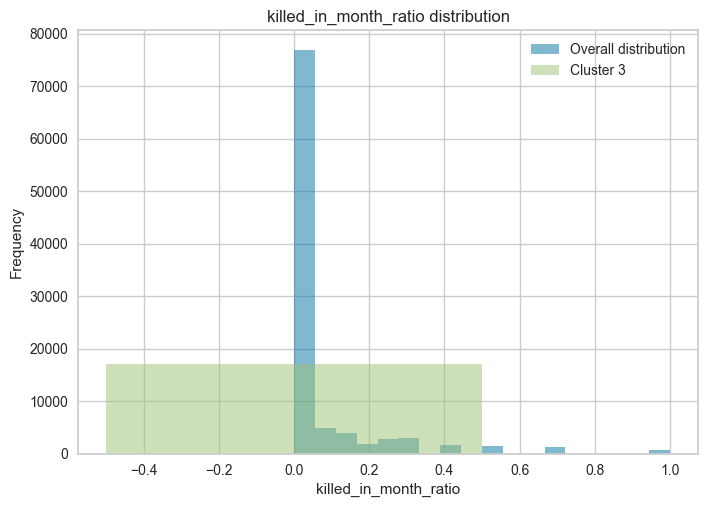

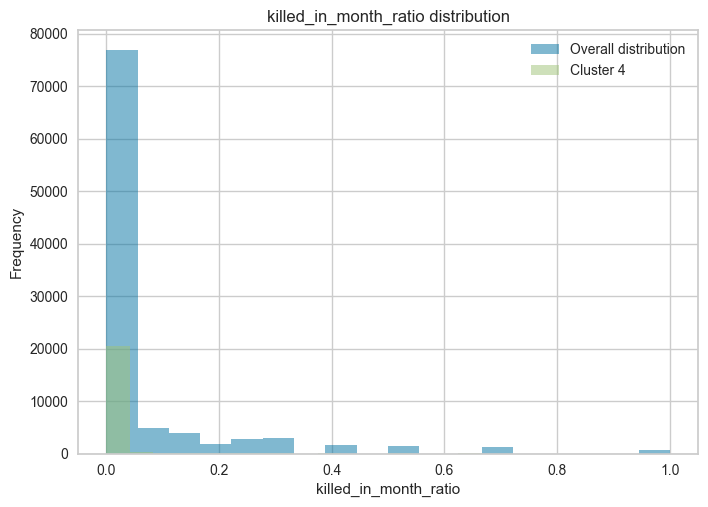

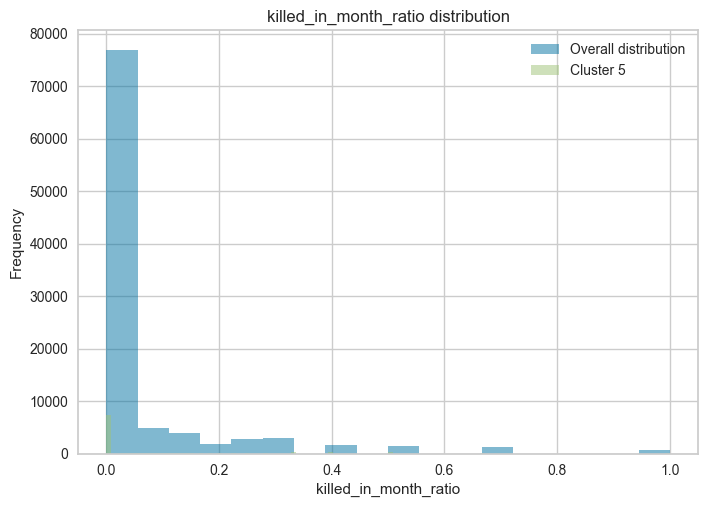

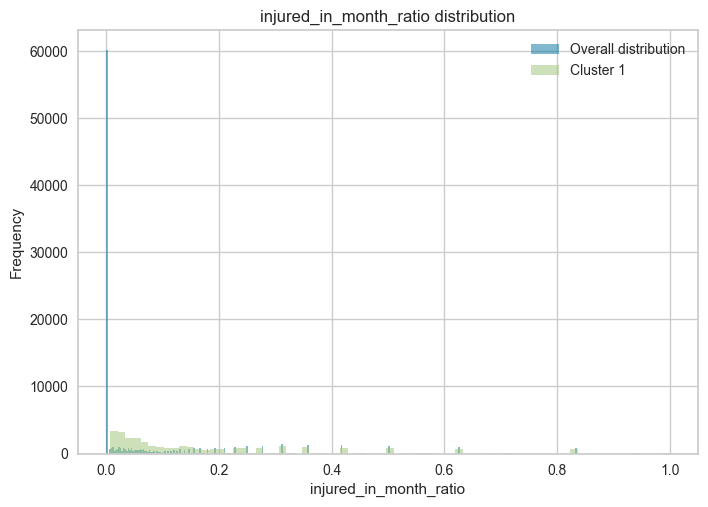

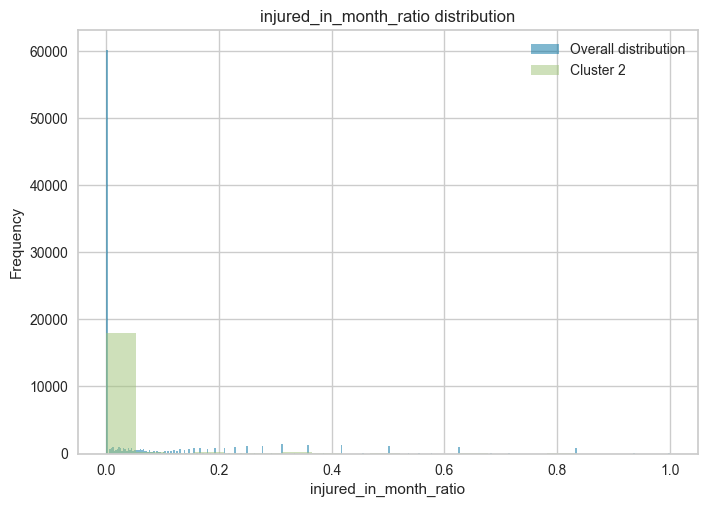

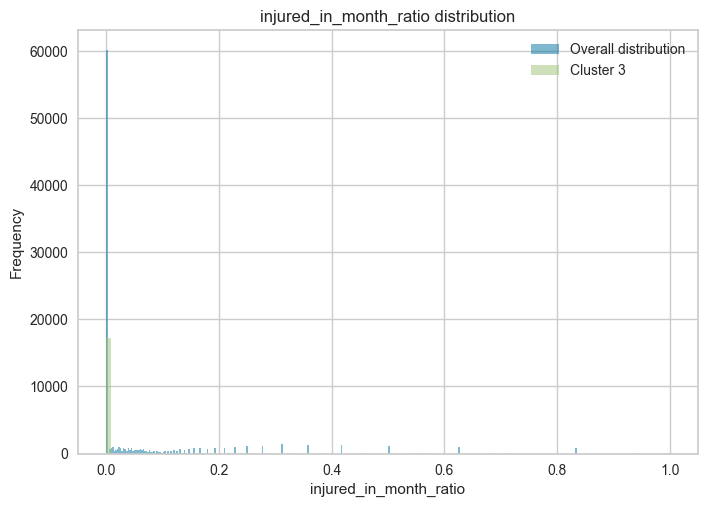

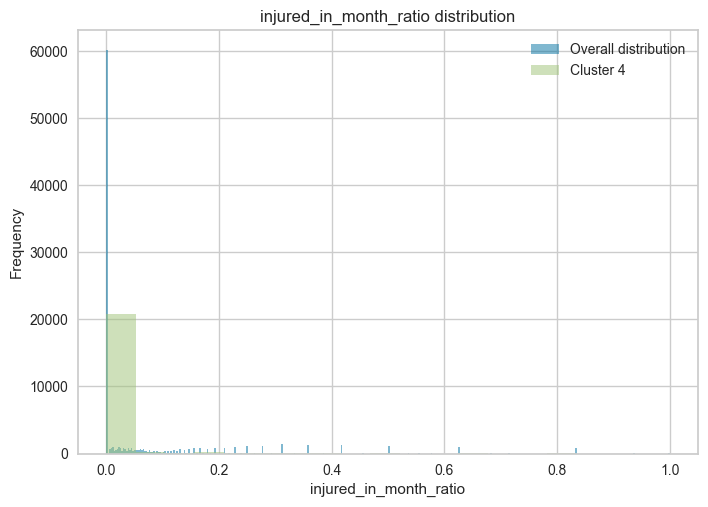

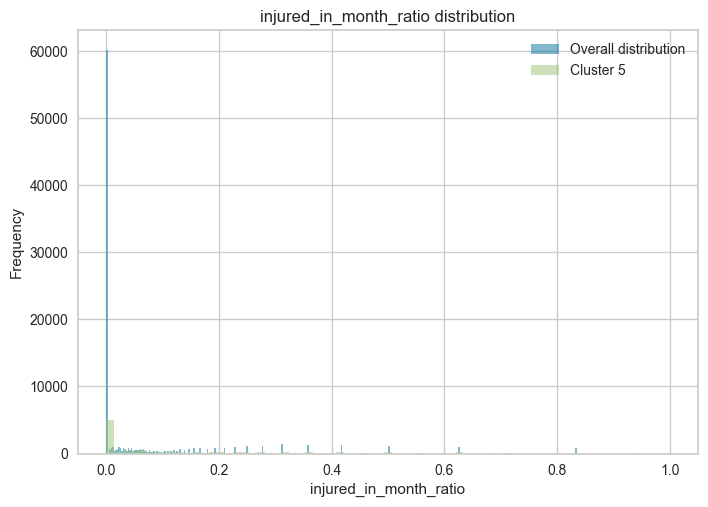

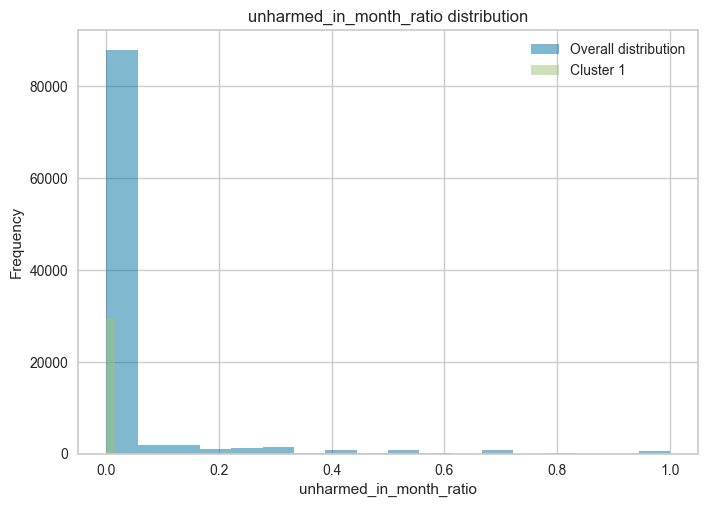

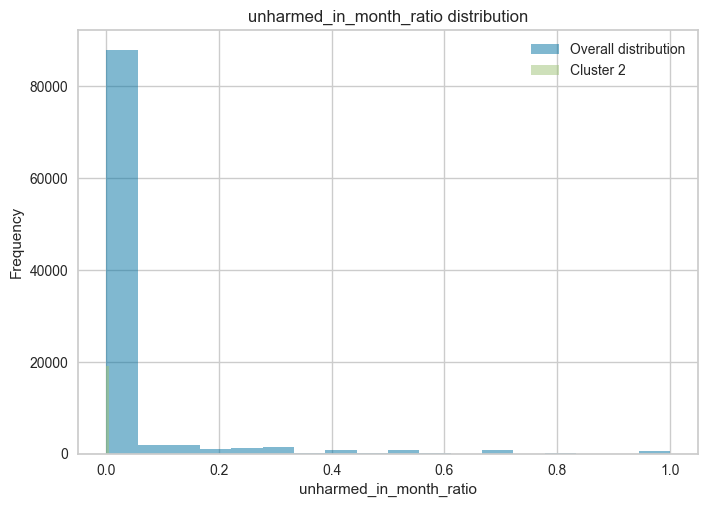

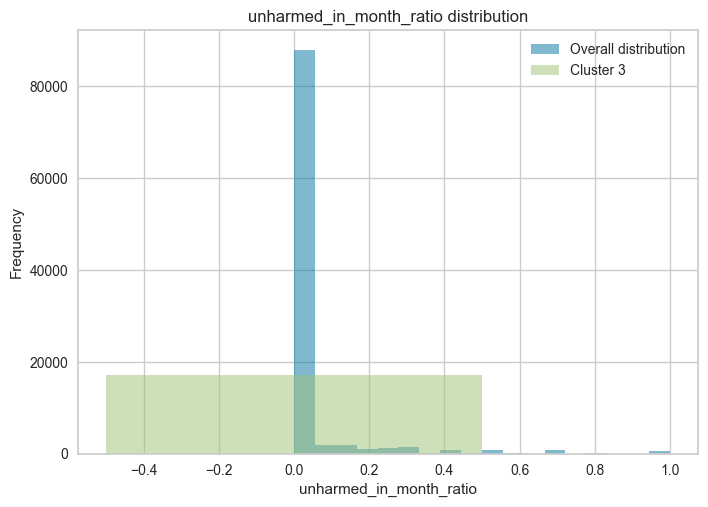

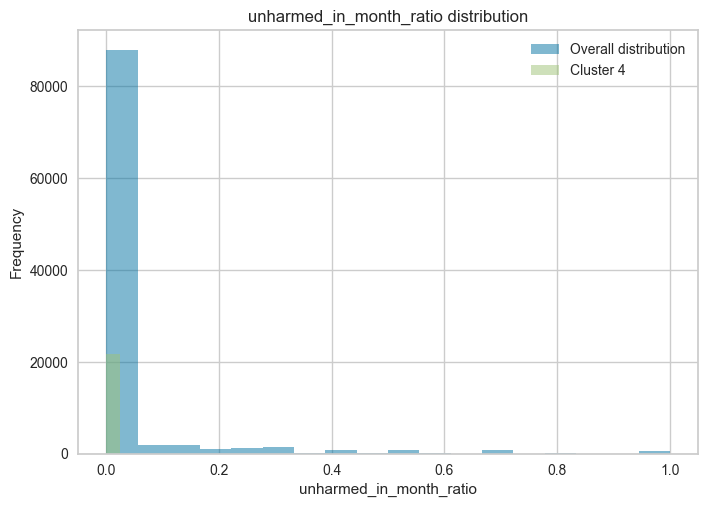

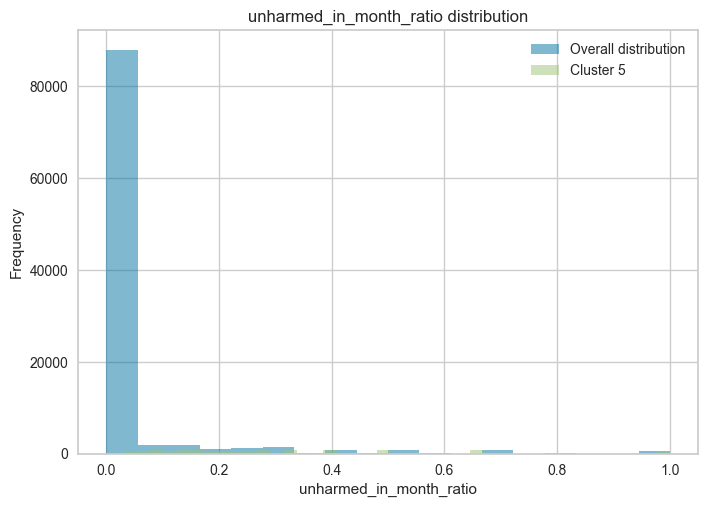

In [53]:
# Perform K-means clustering with the optimal k value
kmeans = KMeans(n_clusters=k_optimal)
kmeans.fit(X_normalized_minmax)
labels = kmeans.labels_

# Analyze the obtained clusters by calculating summary statistics for each variable within each cluster
for k in range(k_optimal):
    cluster_data = X_normalized_minmax[labels == k]
    print('Cluster', k + 1)
    for col in X_normalized_minmax.columns:
        print(f'\t{col}: {cluster_data[col].describe()}')

# Compare the distribution of variables within each cluster to the overall distribution of the variables in the entire dataset
for col in X_normalized_minmax.columns:
    all_data = X_normalized_minmax[col]
    for k in range(k_optimal):
        cluster_data = X_normalized_minmax[labels == k][col]
        plt.hist(all_data, bins='auto', alpha=0.5, label='Overall distribution')
        plt.hist(cluster_data, bins='auto', alpha=0.5, label=f'Cluster {k + 1}')
        plt.title(f'{col} distribution')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()


## Evaluation of Clustering Results for K=5

In [54]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calculate silhouette score
silhouette_score_val = silhouette_score(X_normalized_minmax, labels)
print(f'Silhouette score: {silhouette_score_val:.2f}')

# Calculate Calinski-Harabasz score
calinski_harabasz_score_val = calinski_harabasz_score(X_normalized_minmax, labels)
print(f'Calinski-Harabasz score: {calinski_harabasz_score_val:.2f}')

Silhouette score: 0.35
Calinski-Harabasz score: 36885.98


### Try Different Values of  K

c:\Users\ASUS\.virtualenvs\data-mining-2023-24\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 1
	latitude: count    4646.000000
mean        0.384603
std         0.139321
min         0.017128
25%         0.275454
50%         0.418910
75%         0.505345
max         0.705683
Name: latitude, dtype: float64
	longitude: count    4646.000000
mean        0.669290
std         0.172224
min         0.156132
25%         0.636070
50%         0.698301
75%         0.767389
max         0.998131
Name: longitude, dtype: float64
	avg_age_participants: count    4646.000000
mean        0.419216
std         0.185082
min         0.112903
25%         0.274194
50%         0.370968
75%         0.532258
max         1.000000
Name: avg_age_participants, dtype: float64
	males_ratio: count    4646.000000
mean        0.307953
std         0.254155
min         0.000000
25%         0.000000
50%         0.500000
75%         0.500000
max         0.750000
Name: males_ratio, dtype: float64
	povertyPercentage: count    4646.000000
mean        0.414924
std         0.204216
min         0.000000
25%         0.

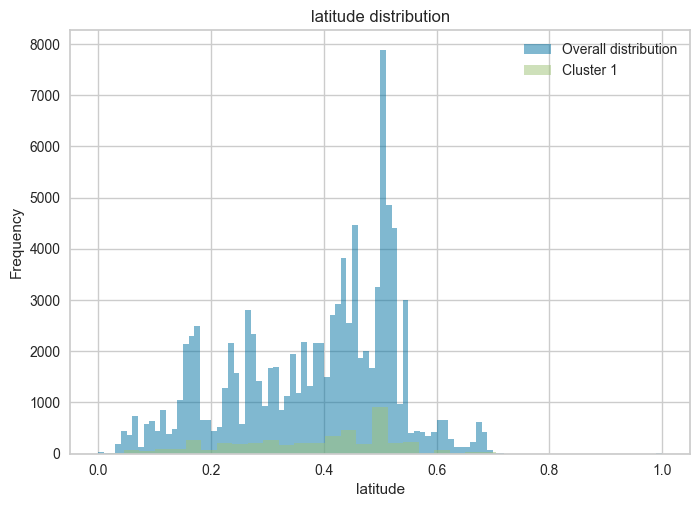

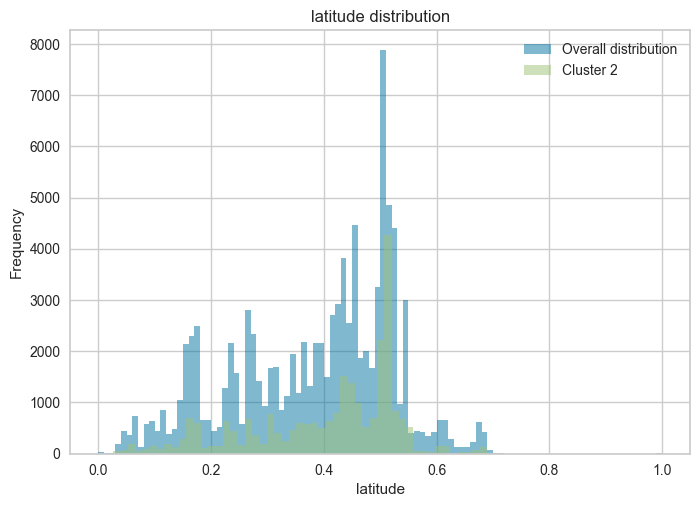

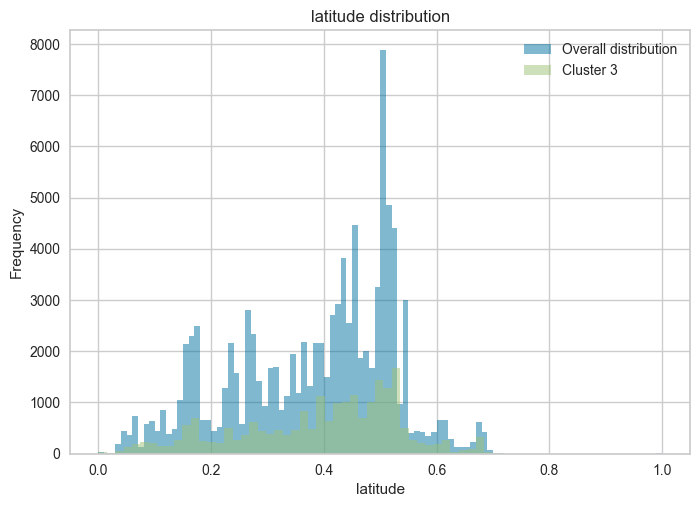

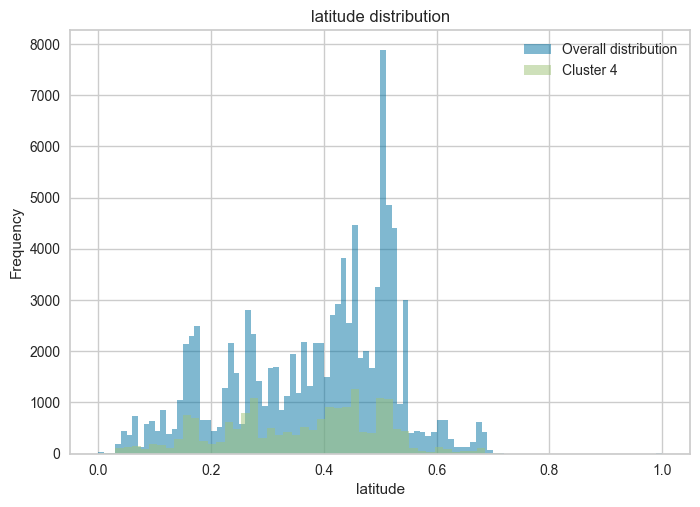

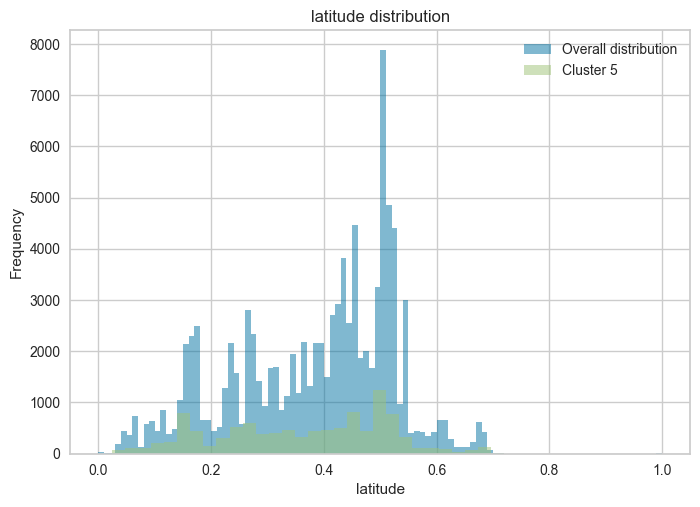

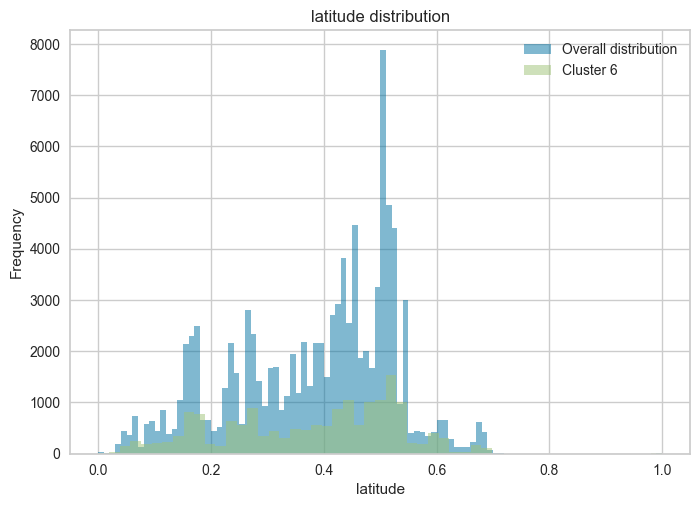

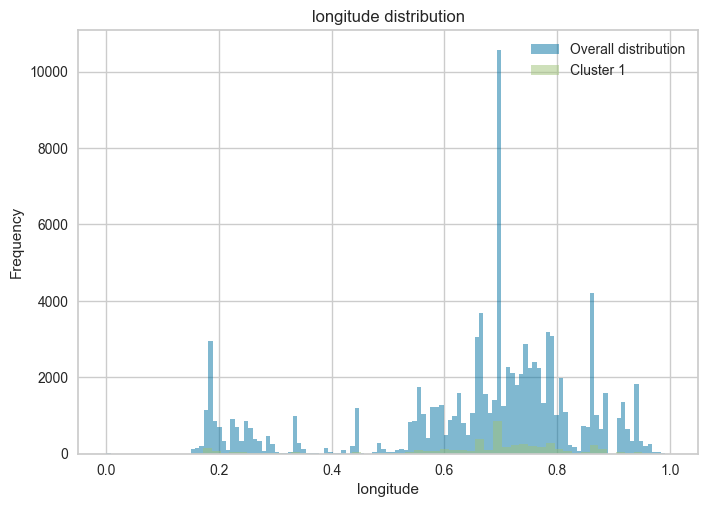

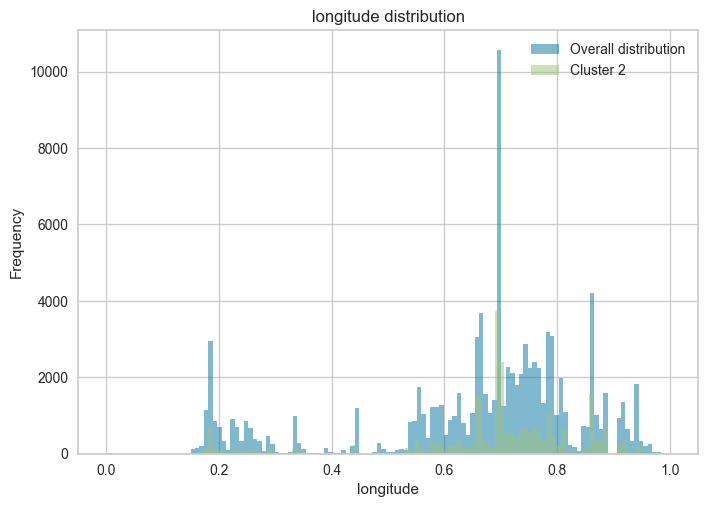

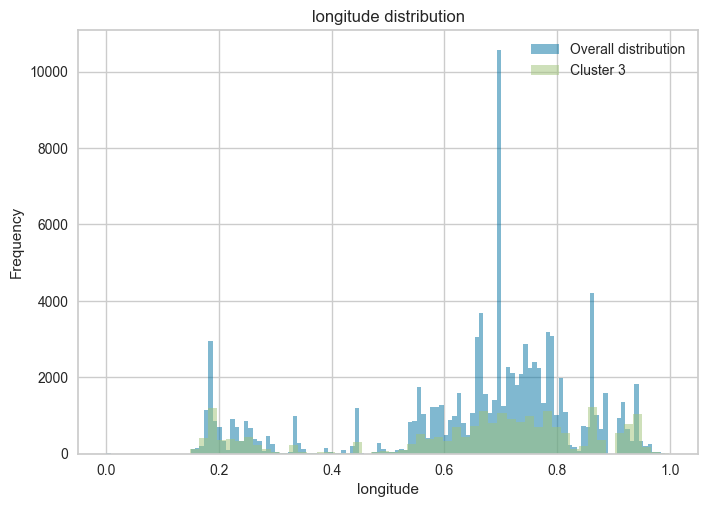

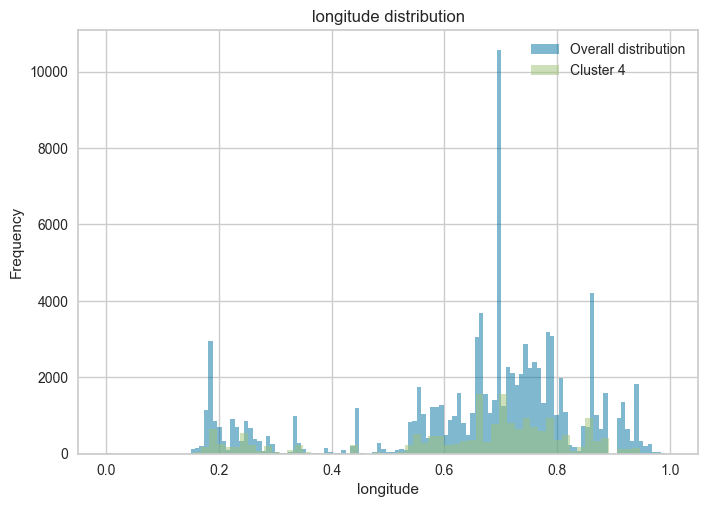

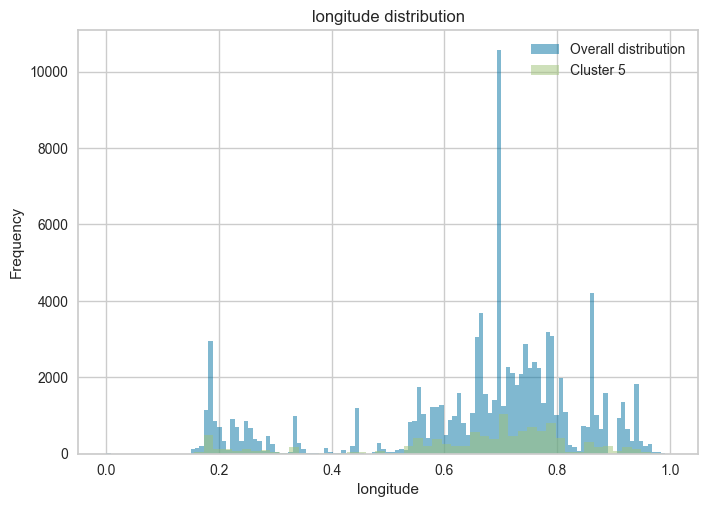

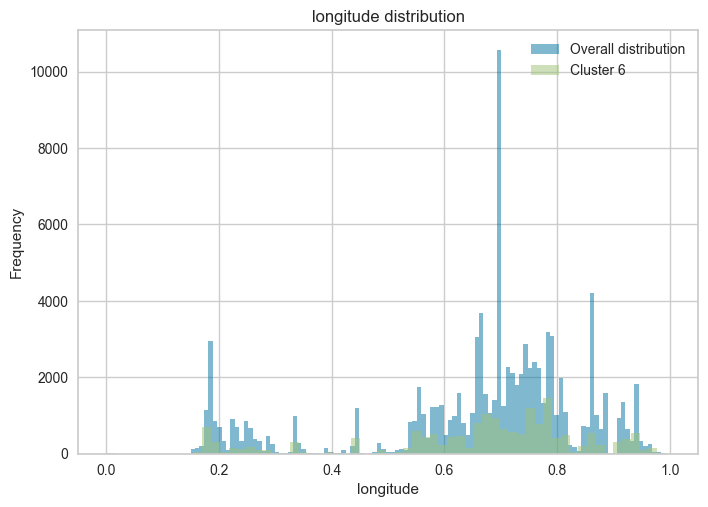

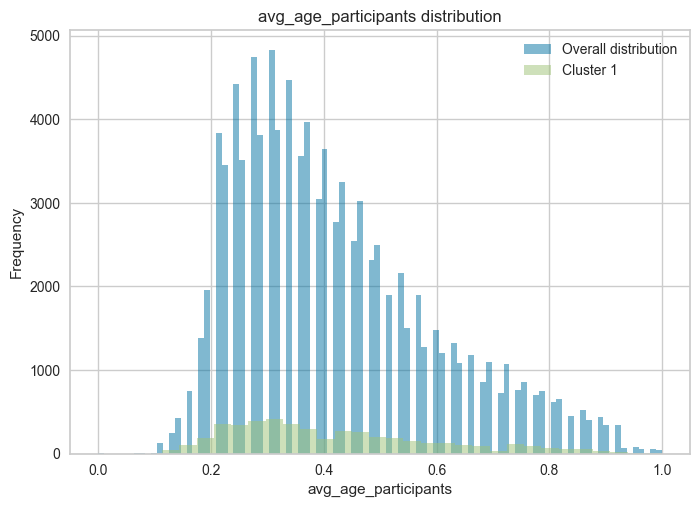

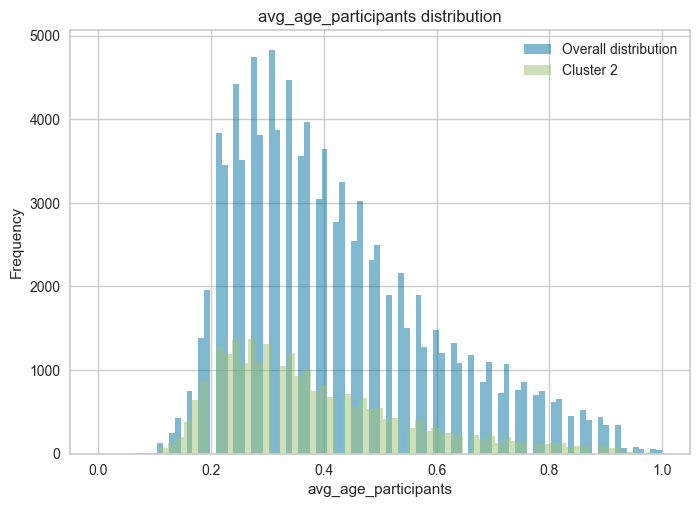

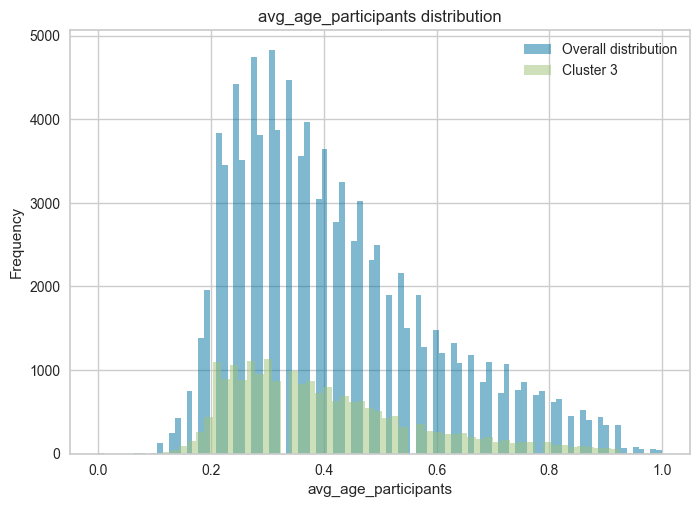

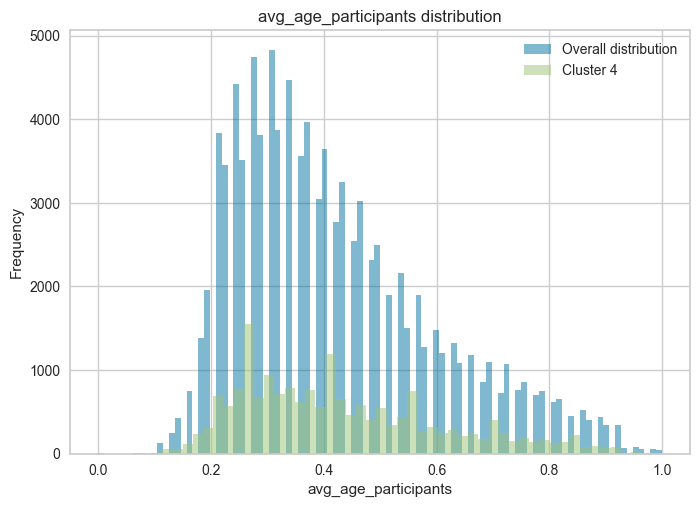

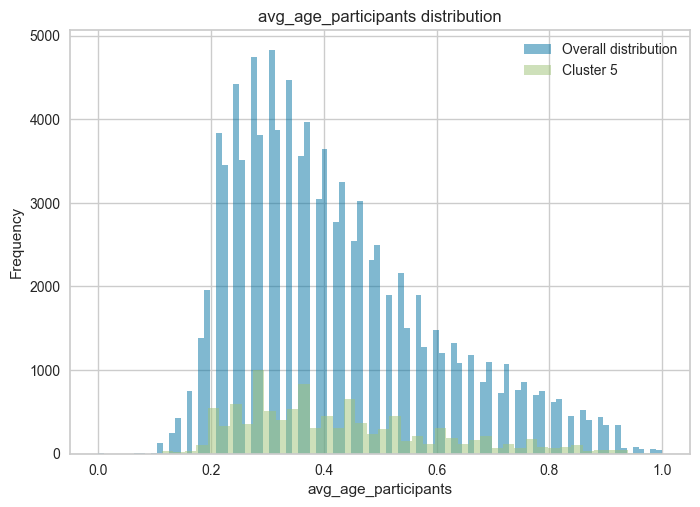

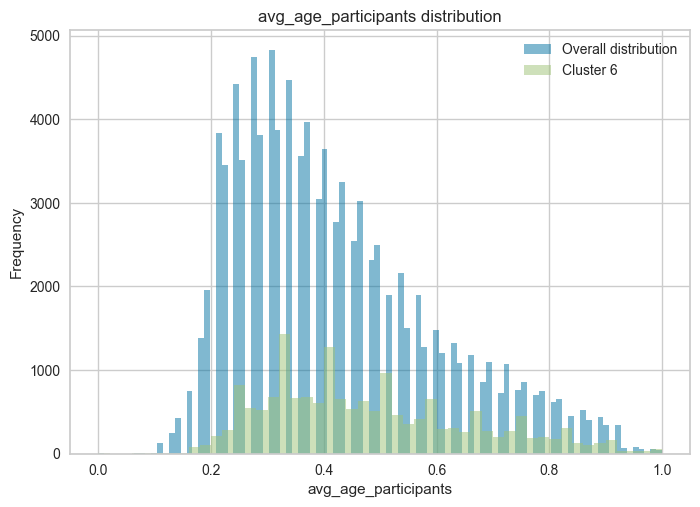

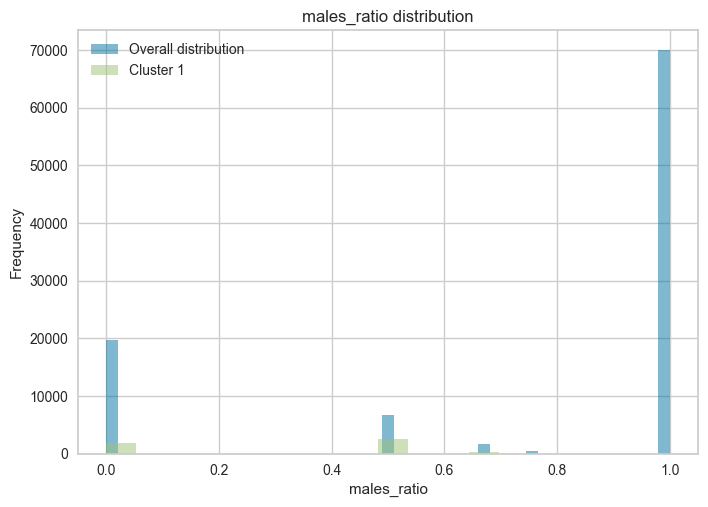

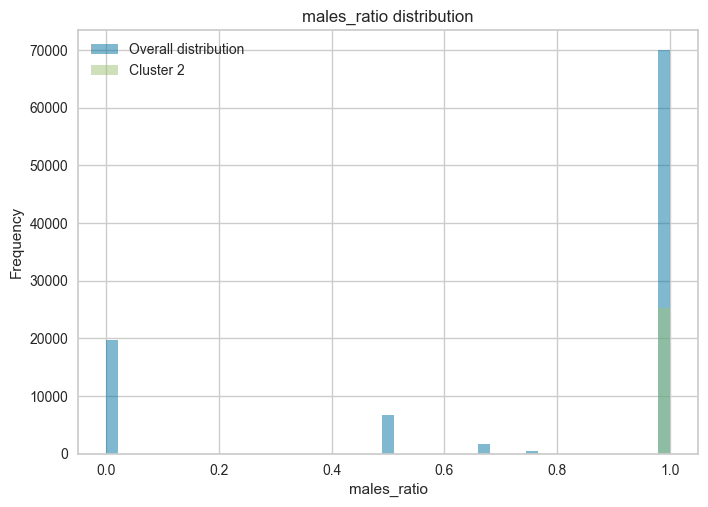

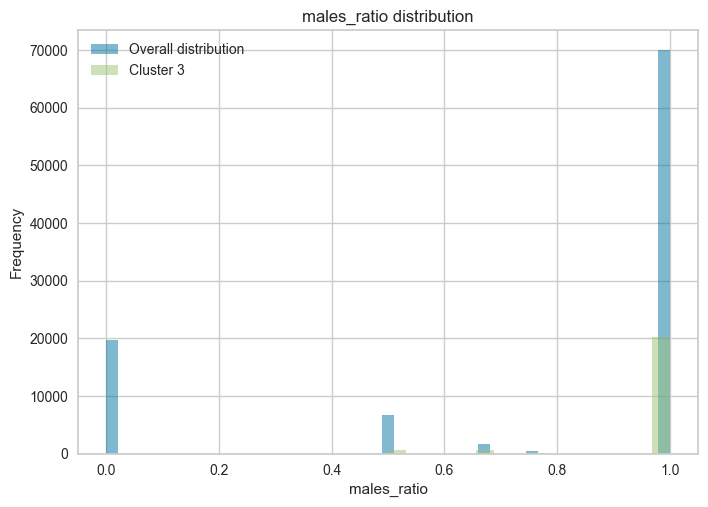

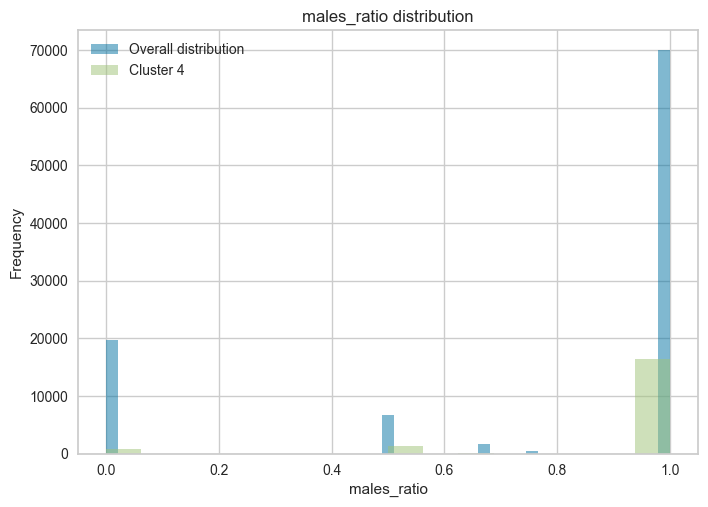

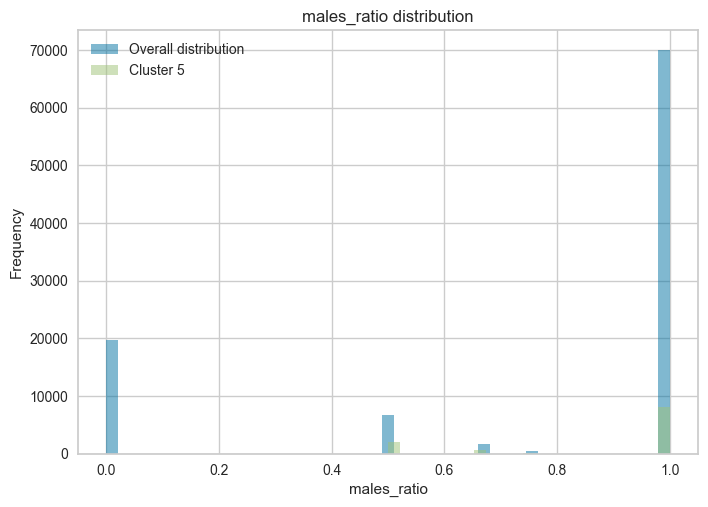

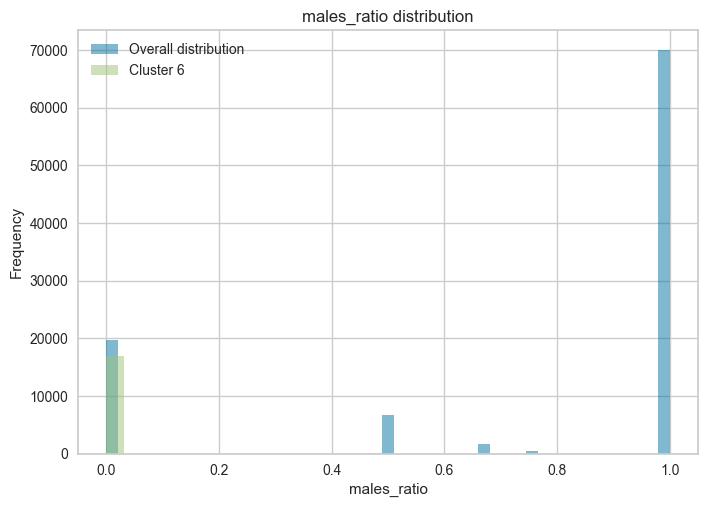

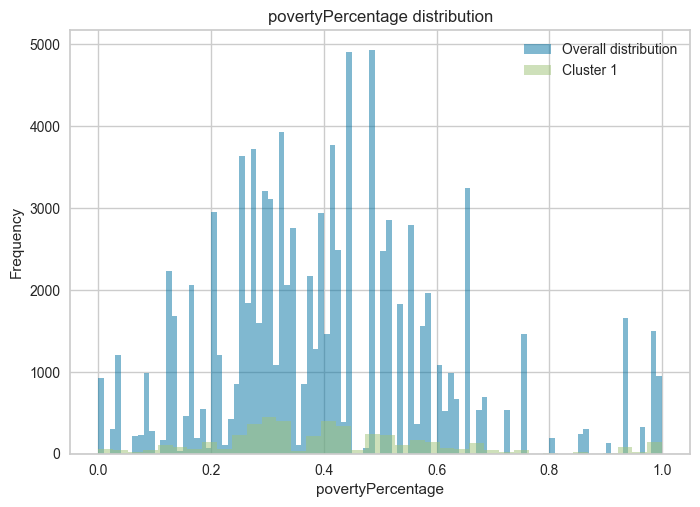

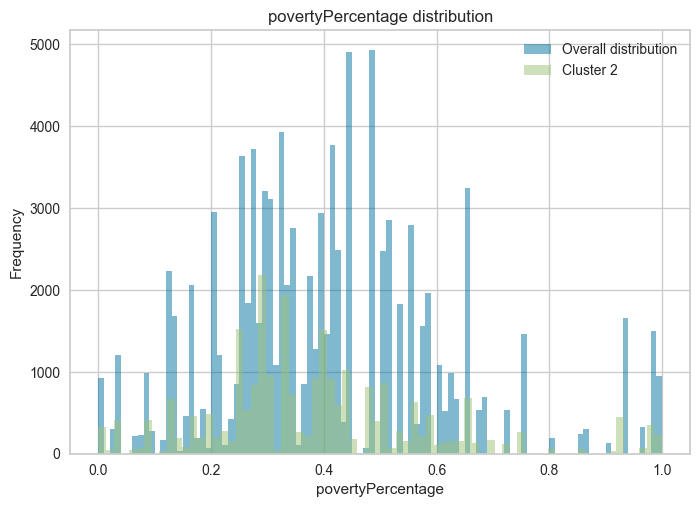

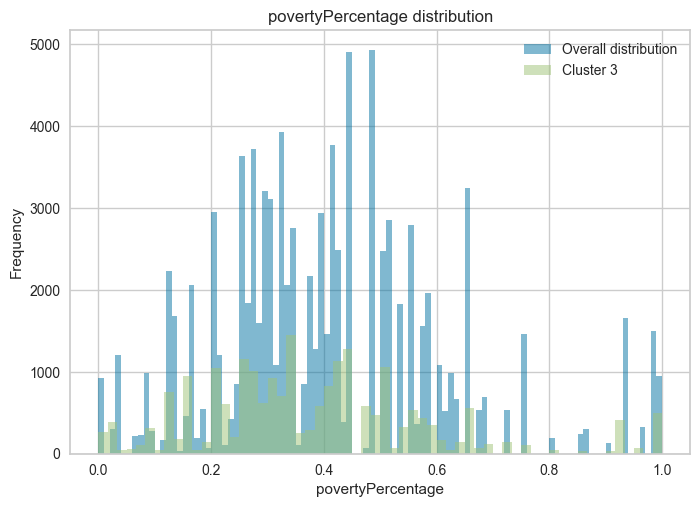

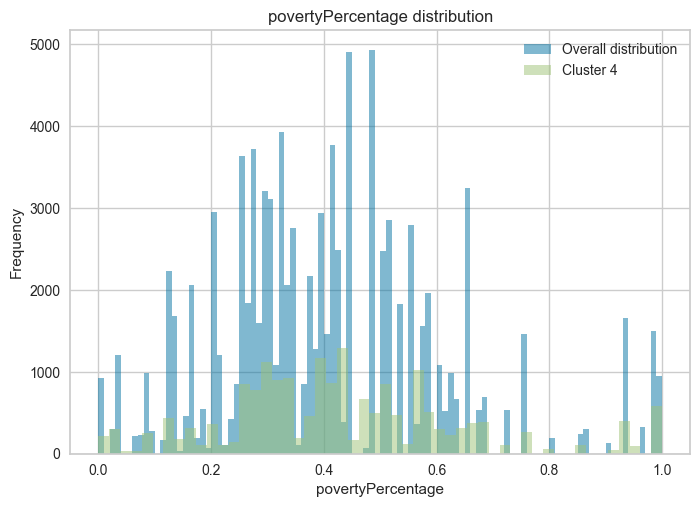

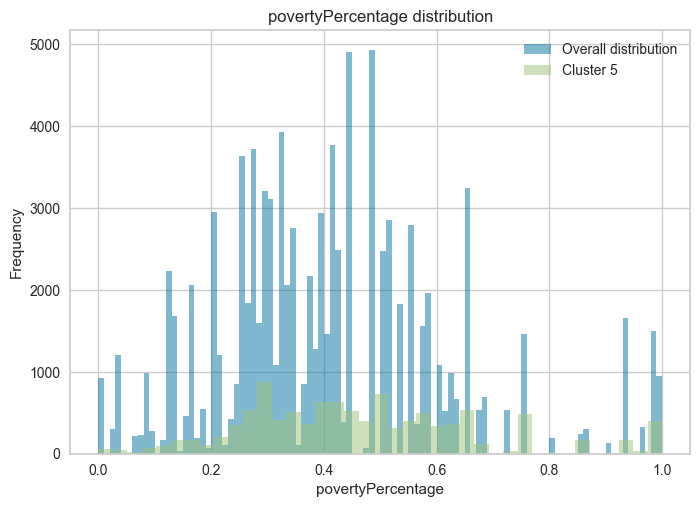

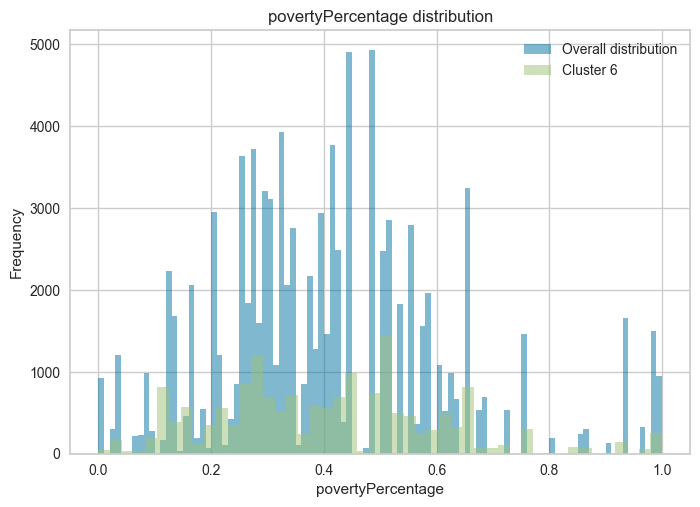

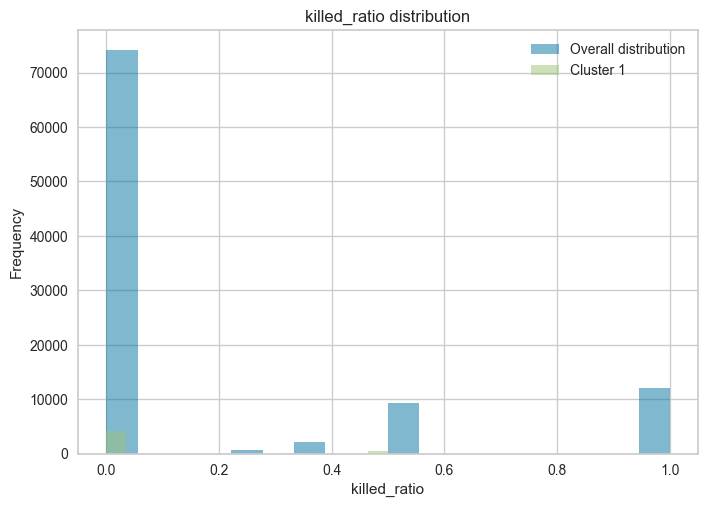

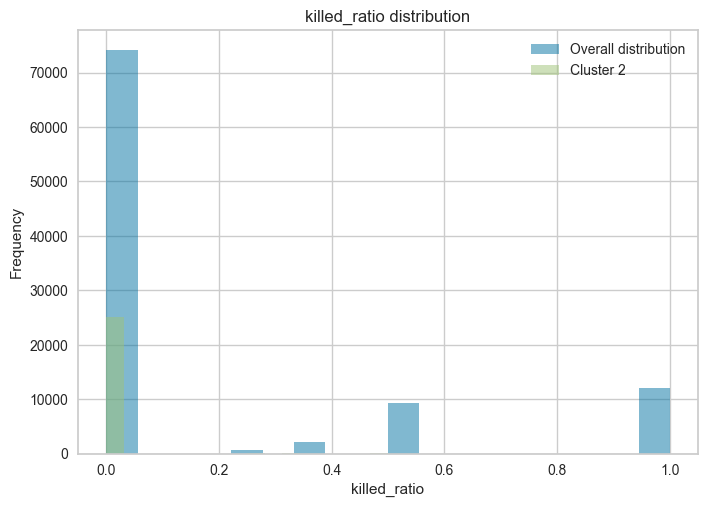

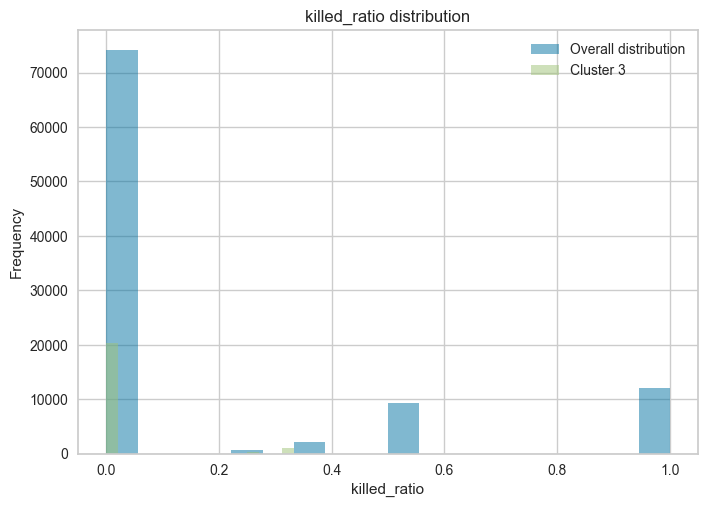

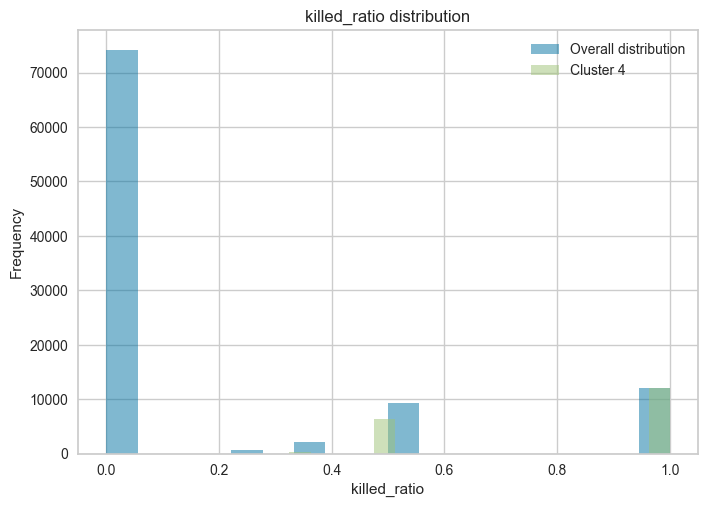

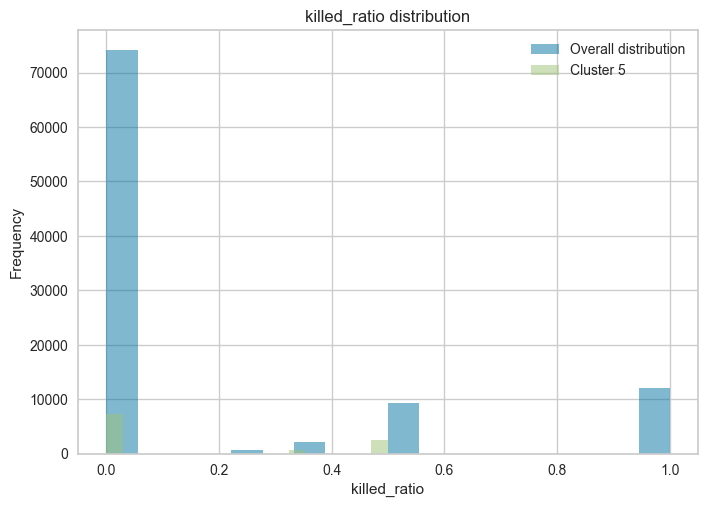

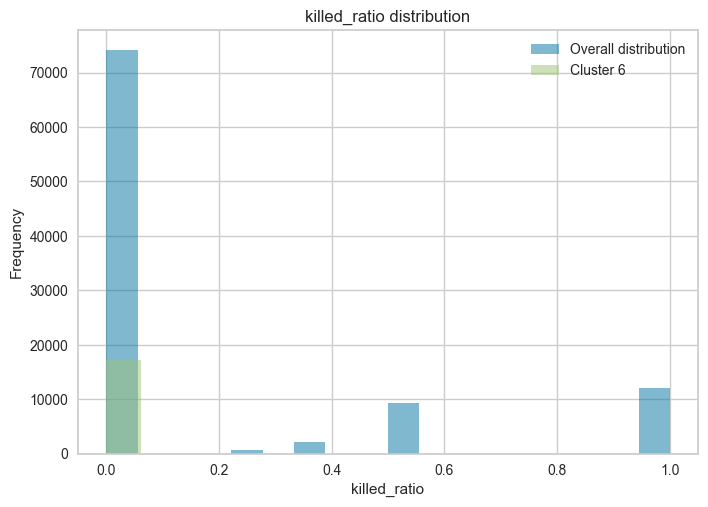

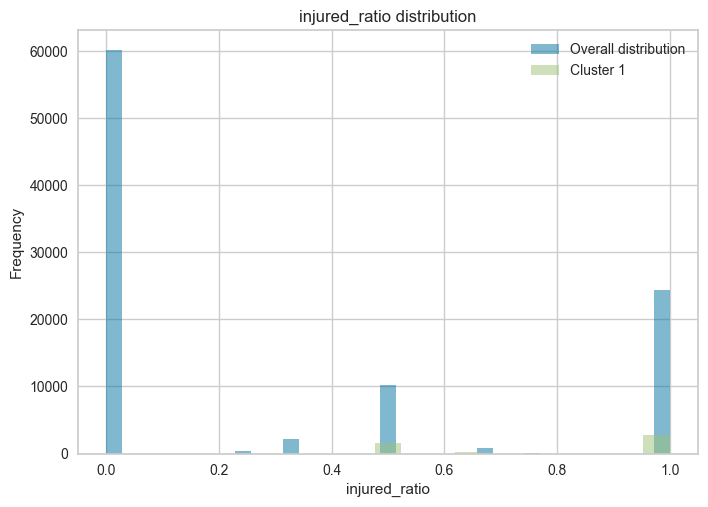

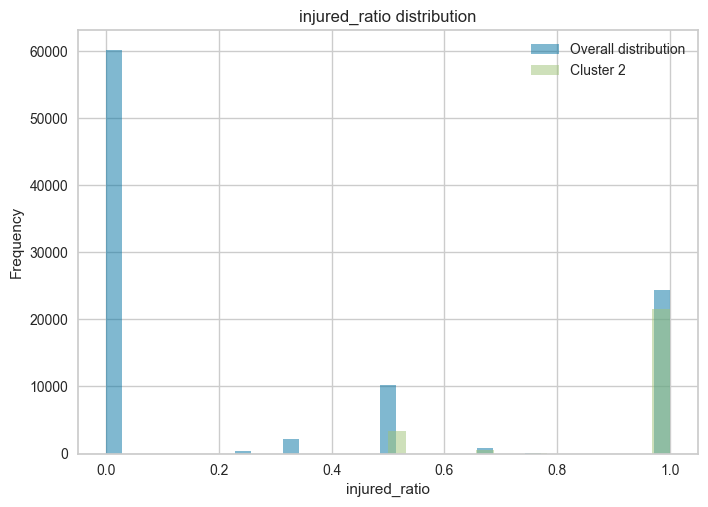

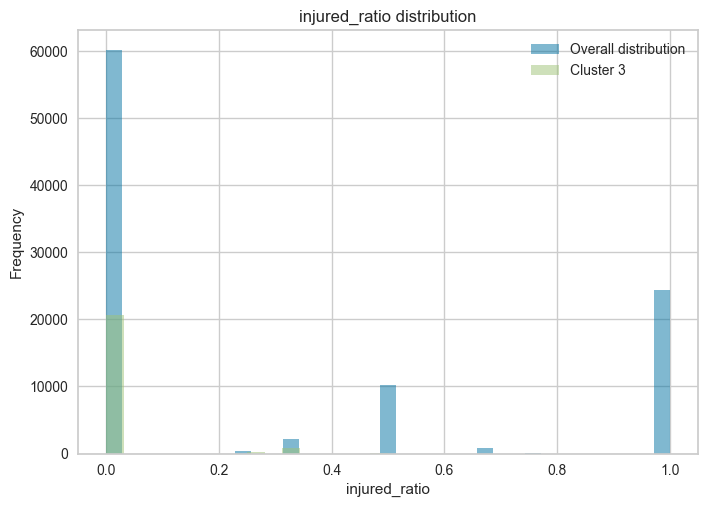

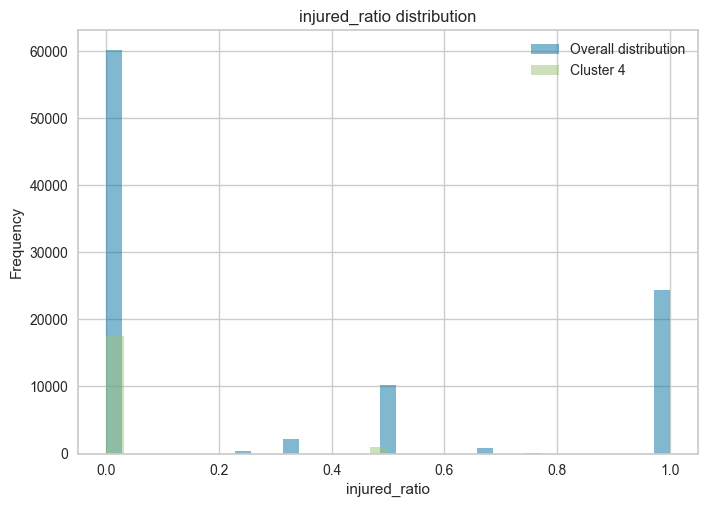

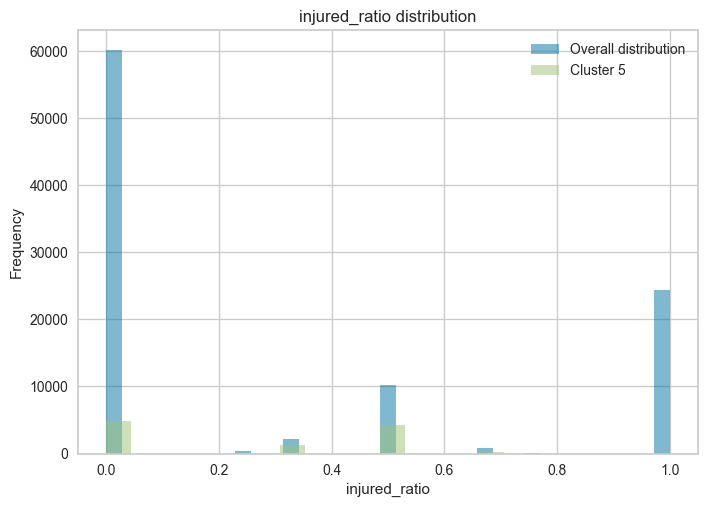

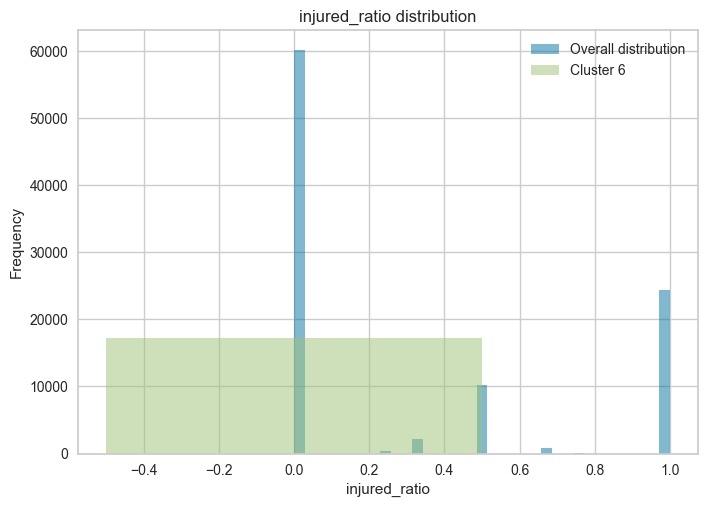

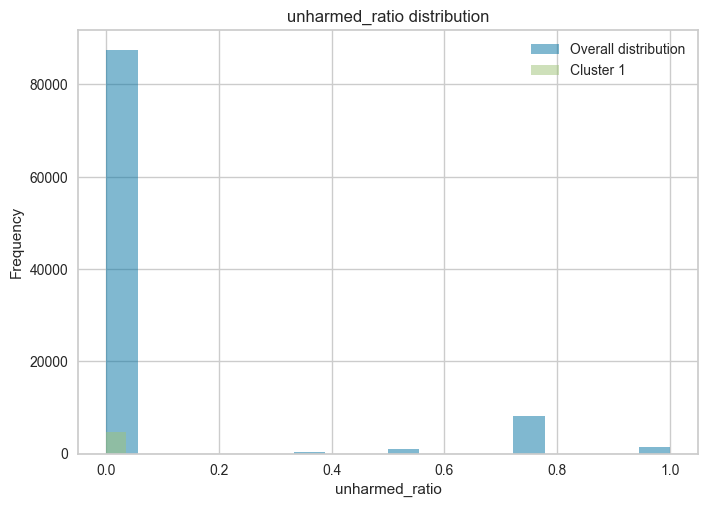

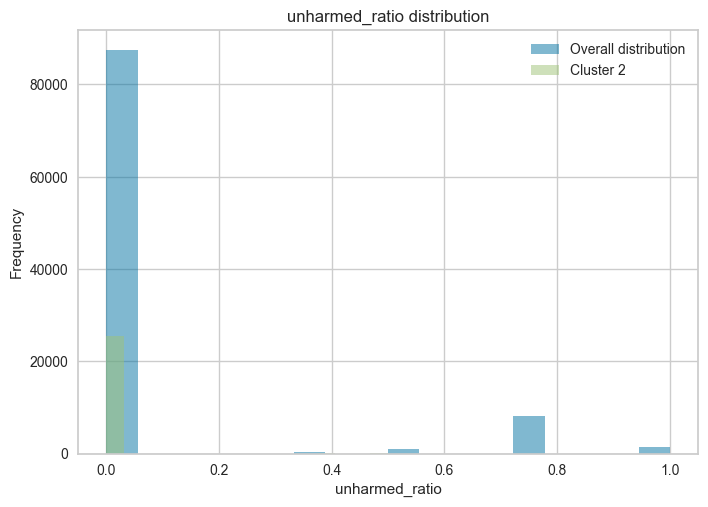

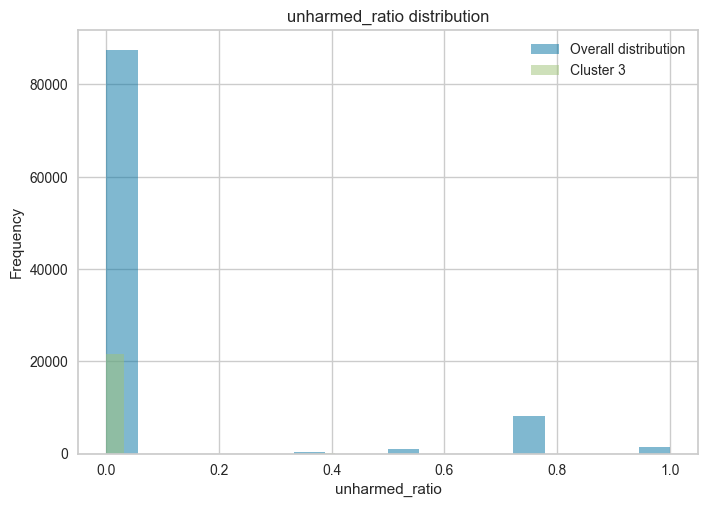

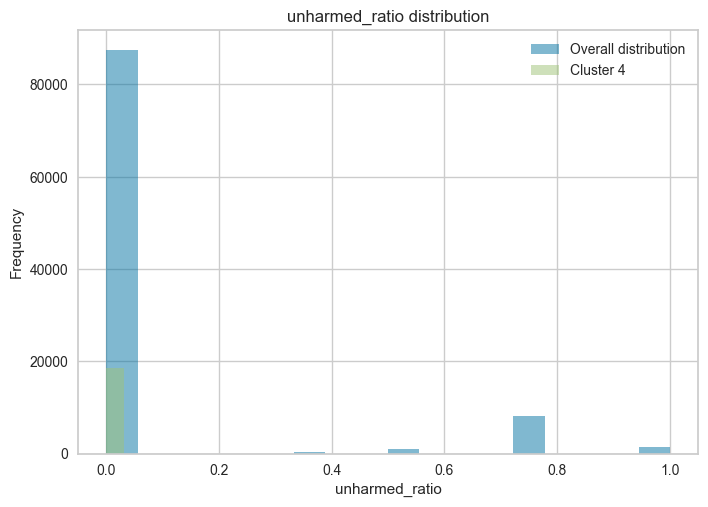

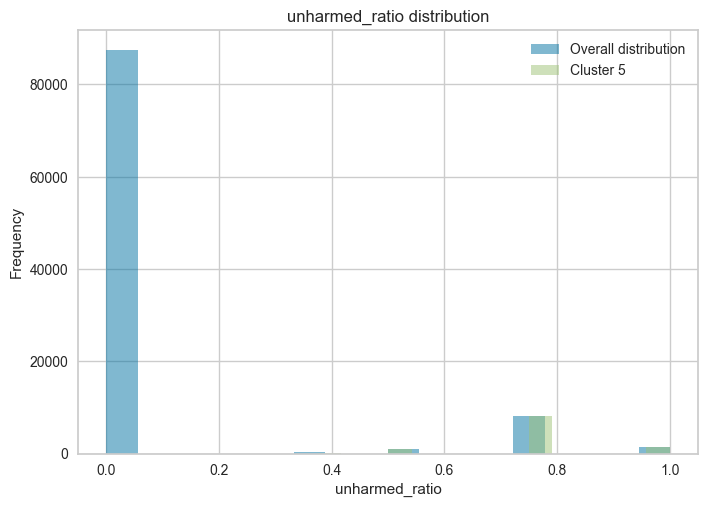

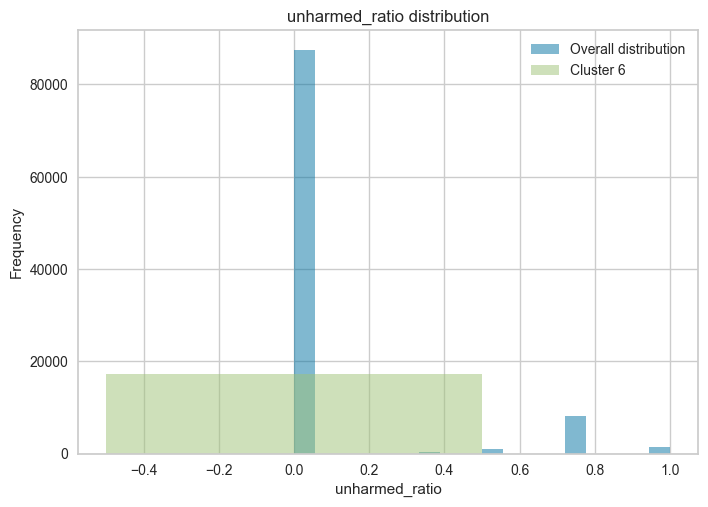

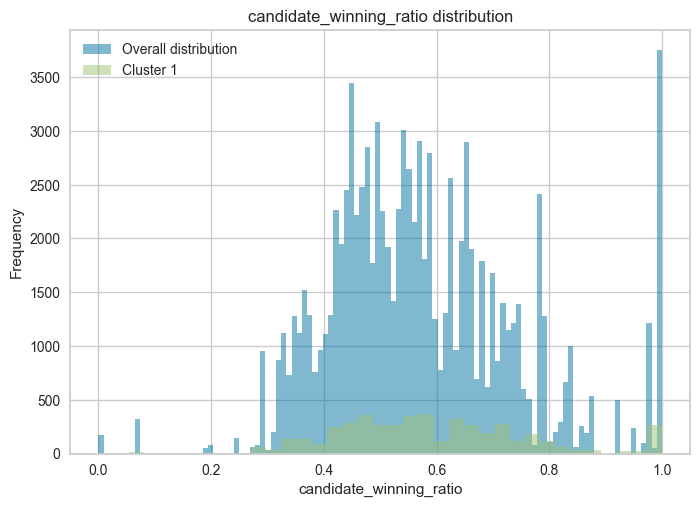

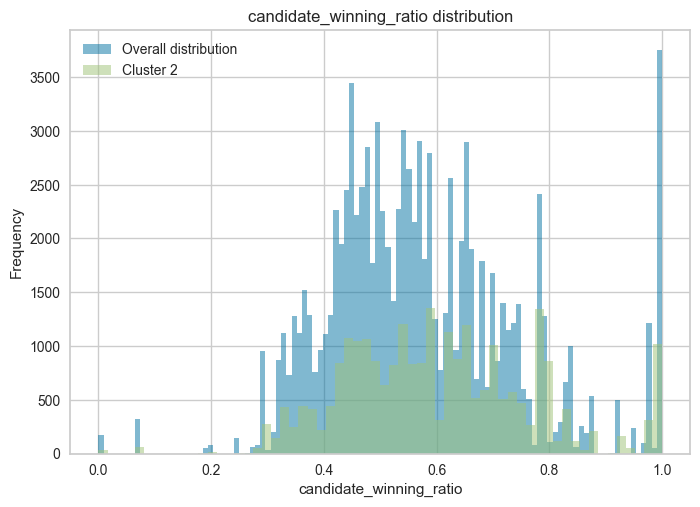

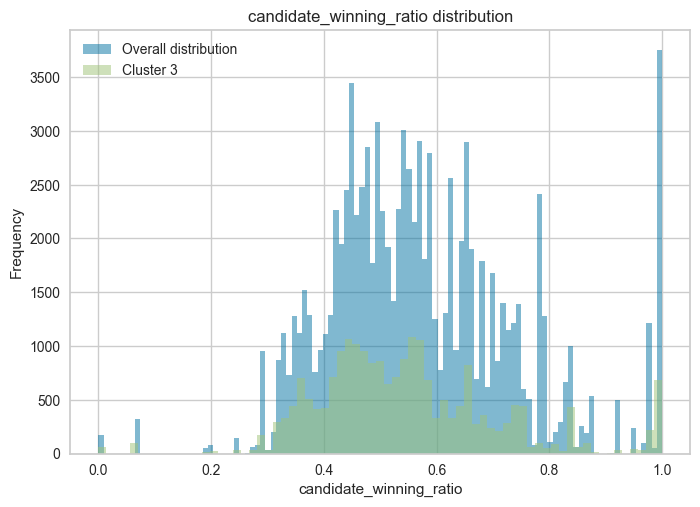

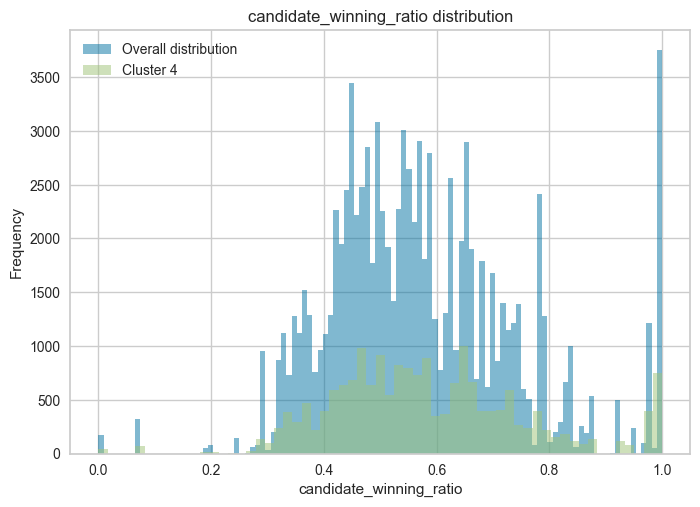

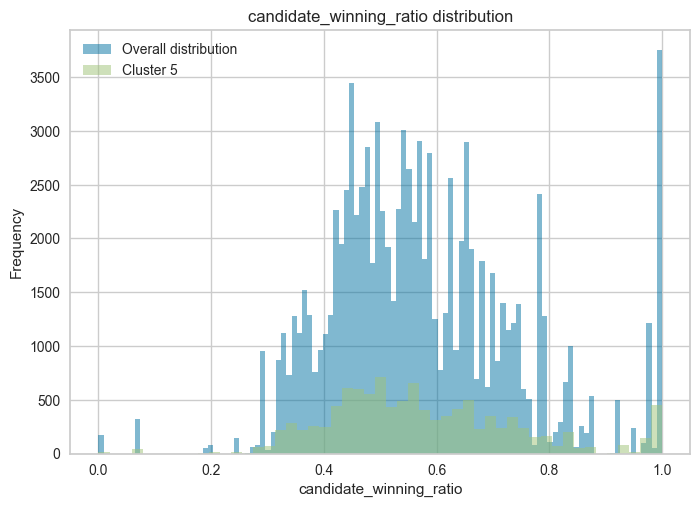

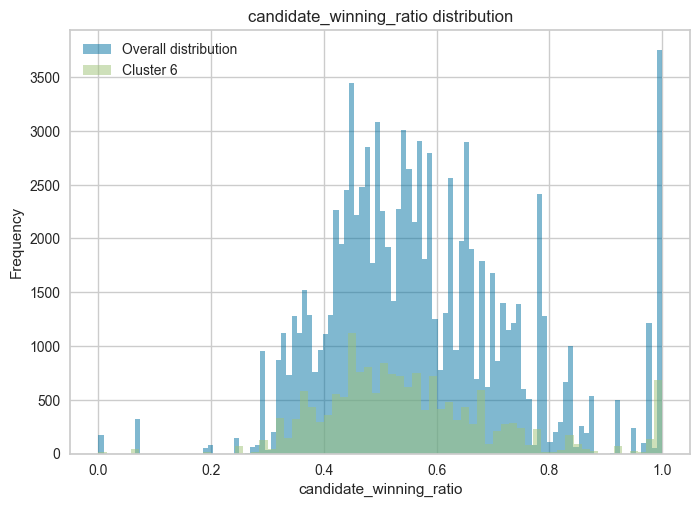

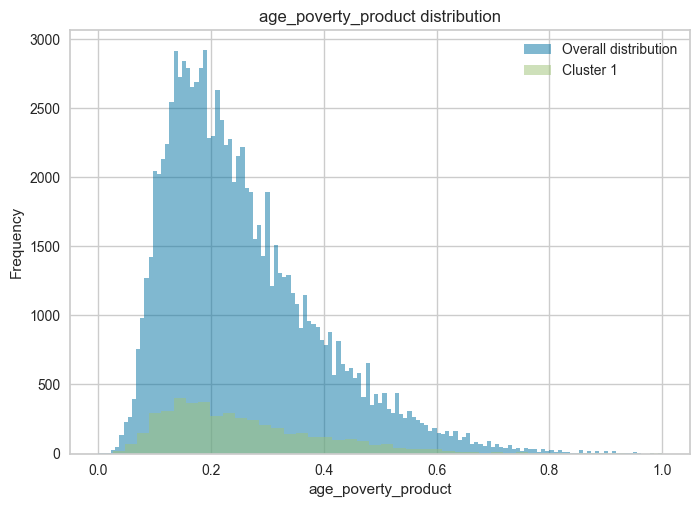

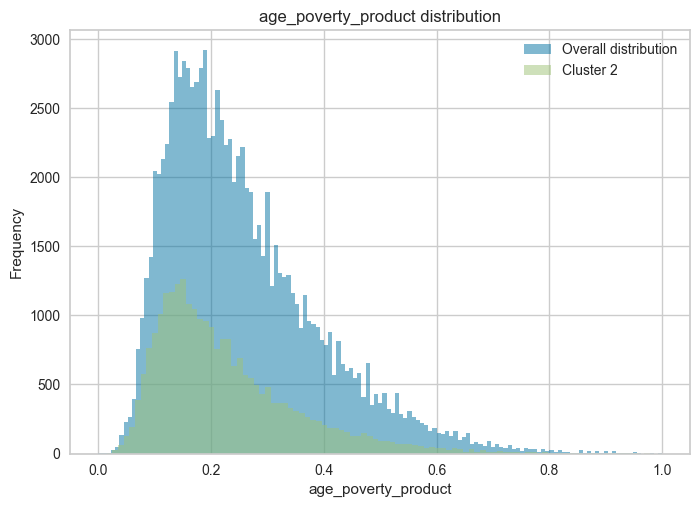

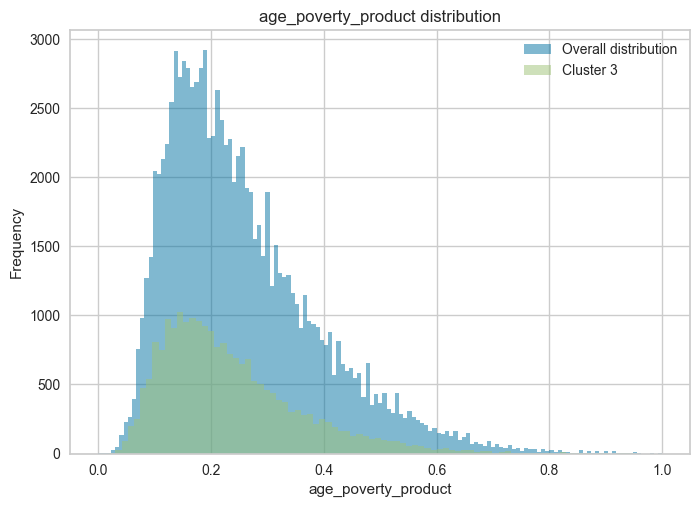

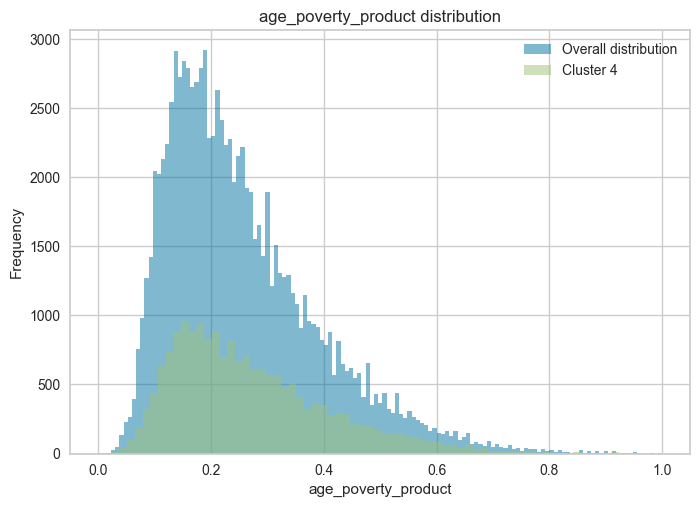

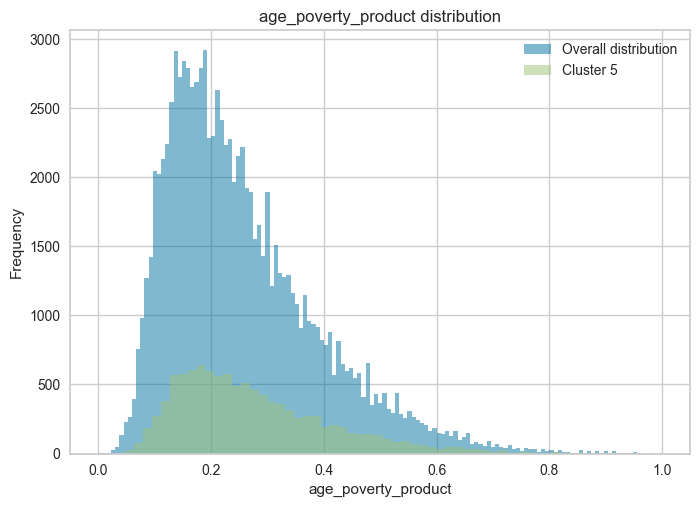

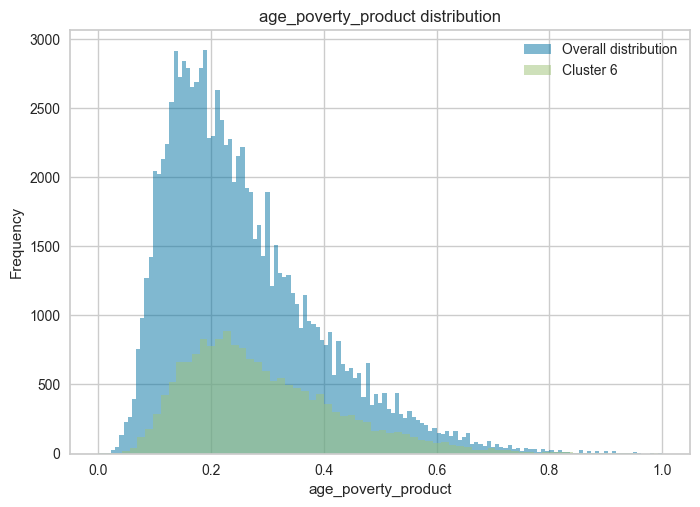

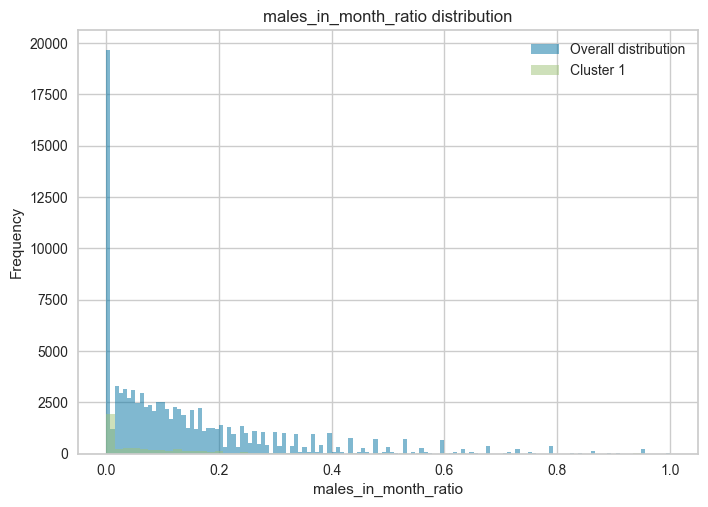

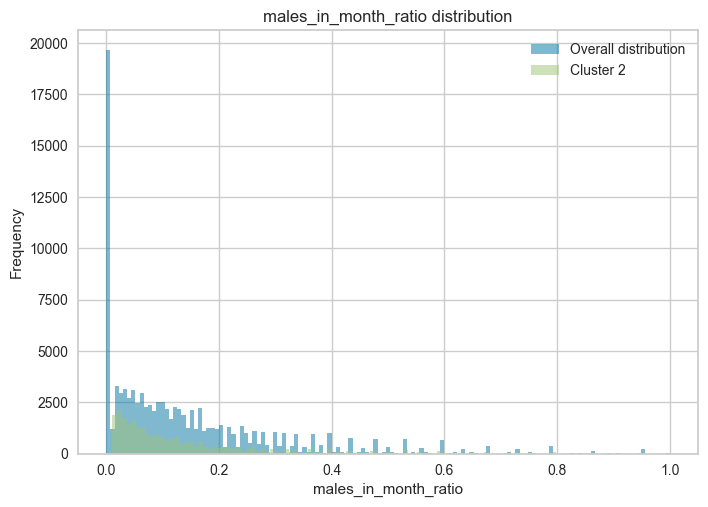

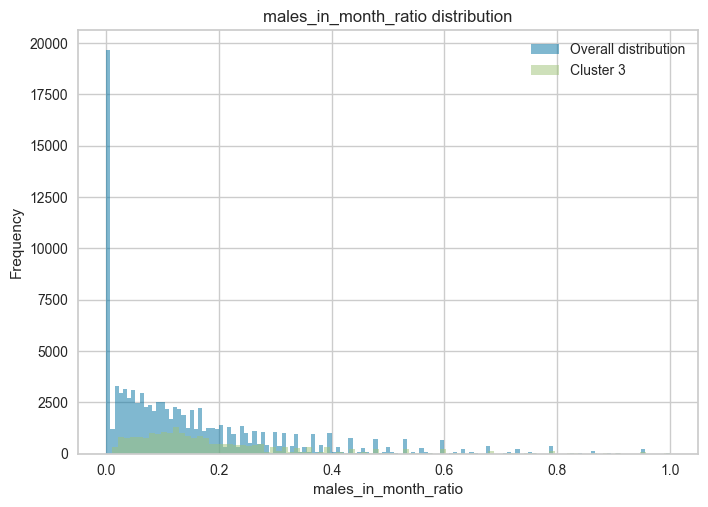

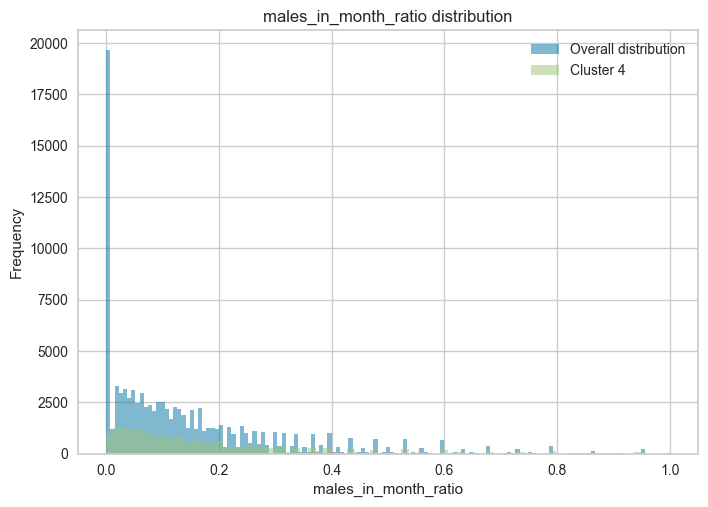

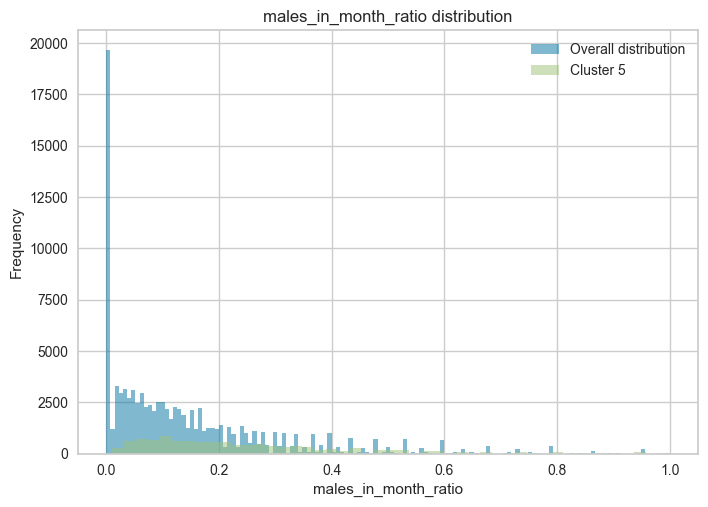

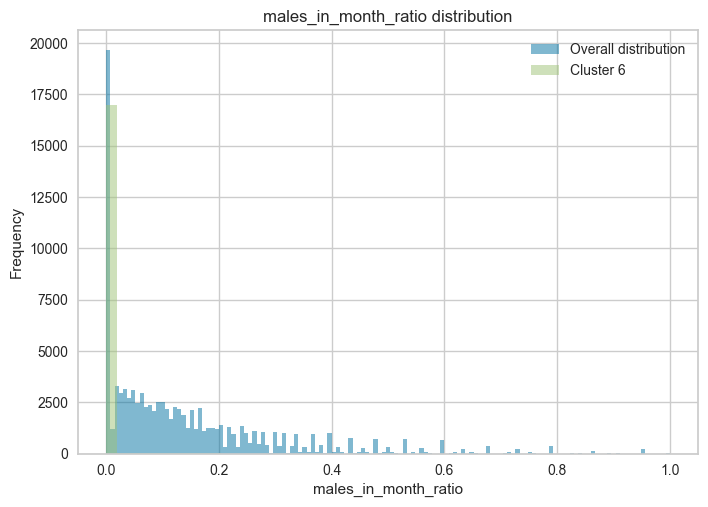

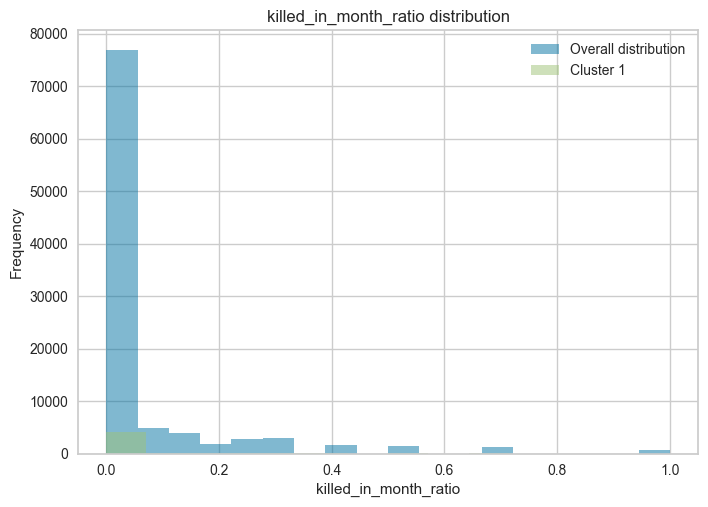

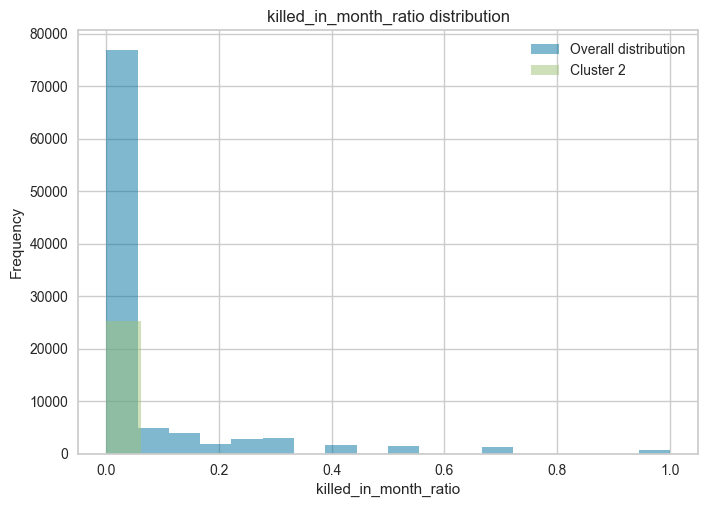

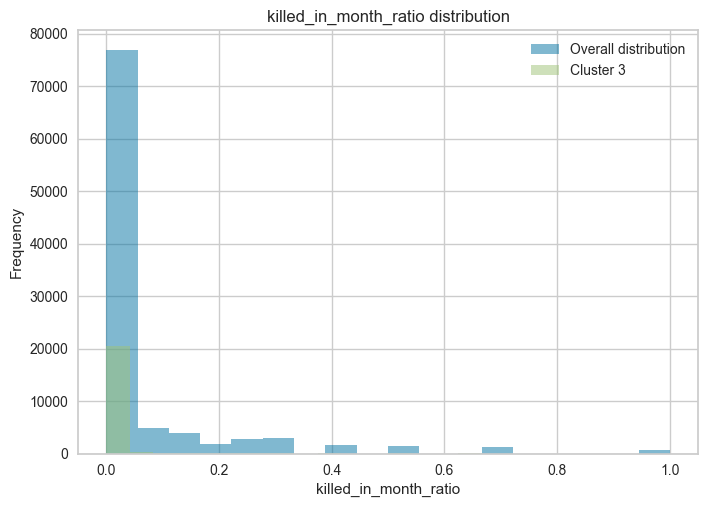

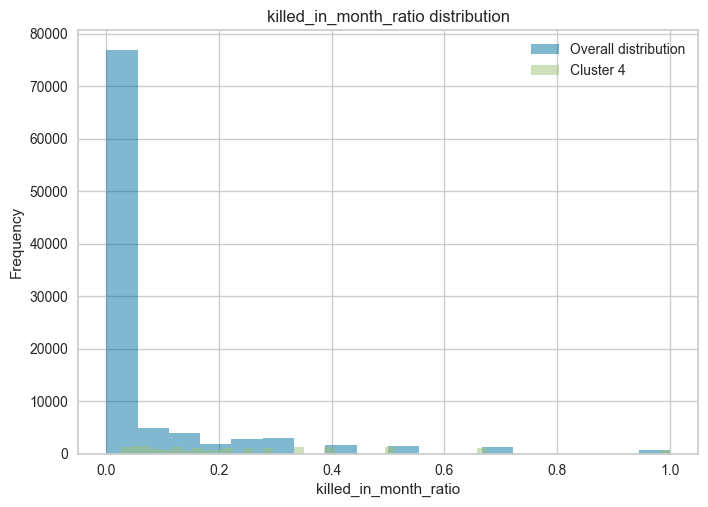

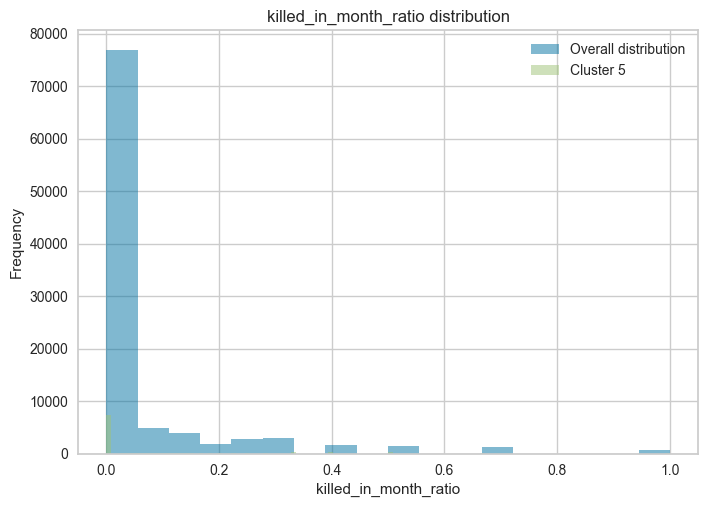

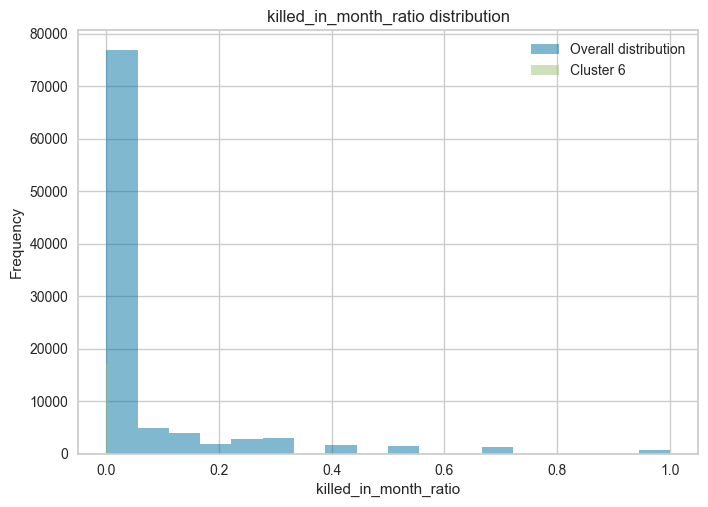

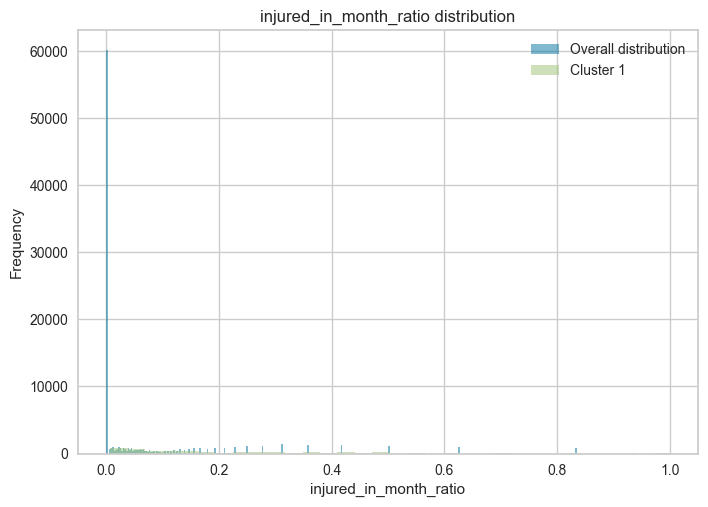

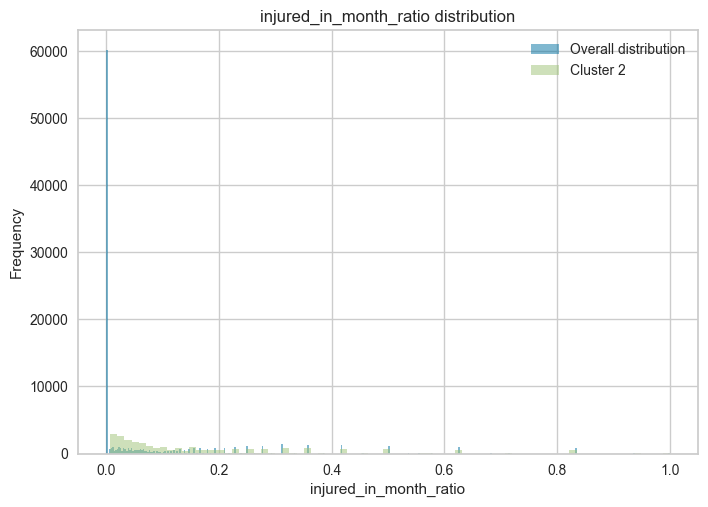

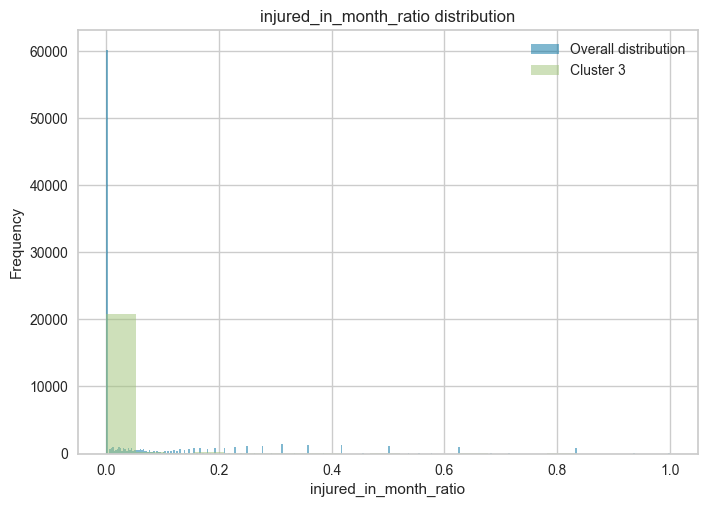

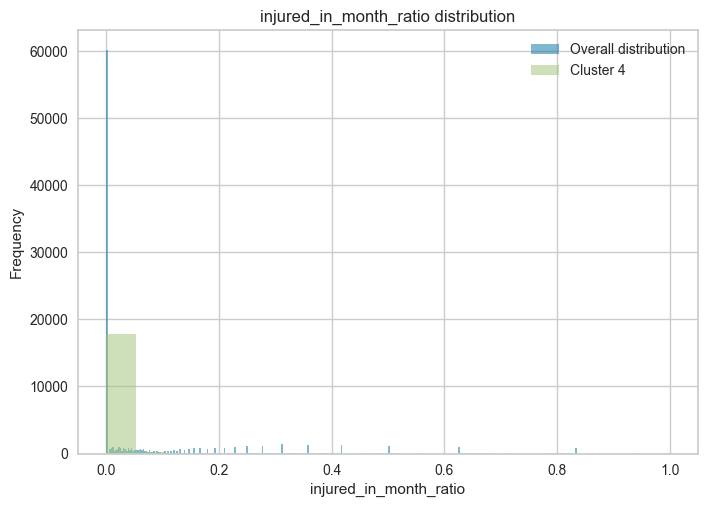

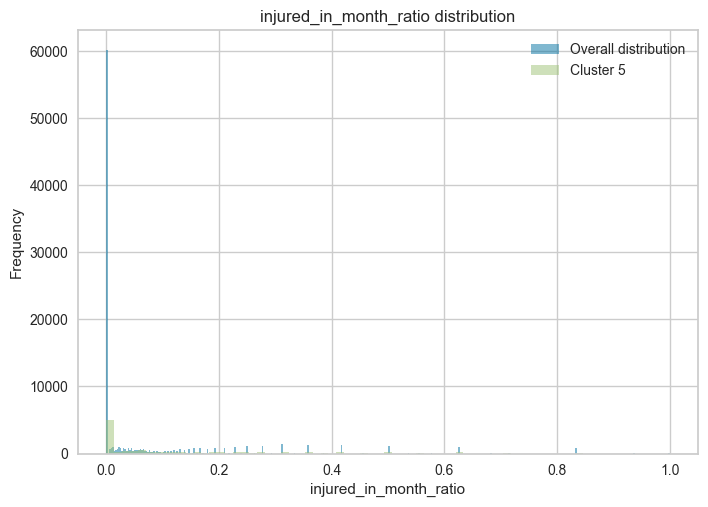

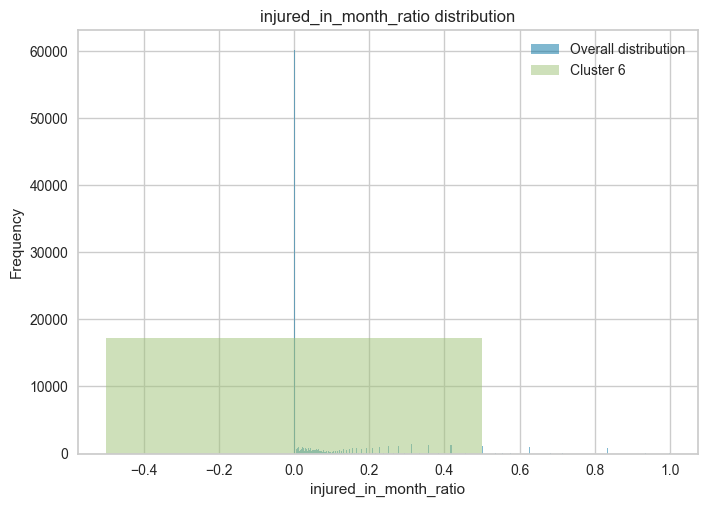

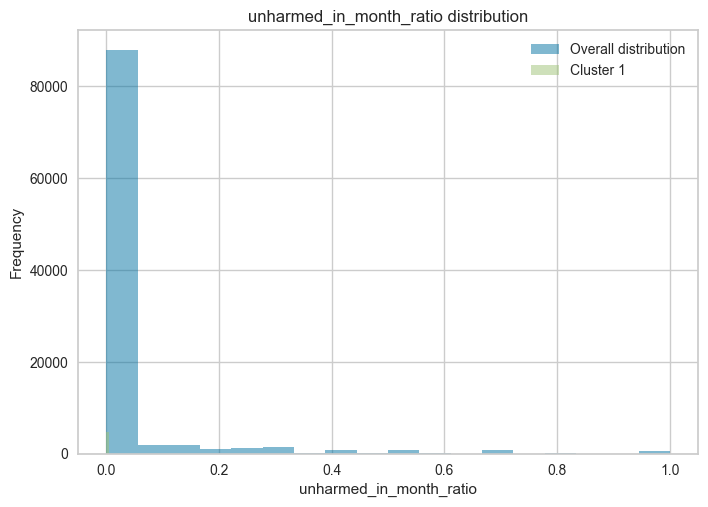

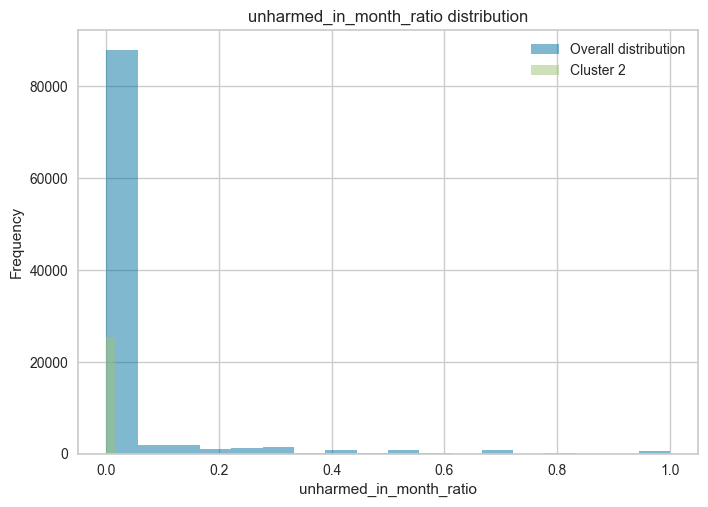

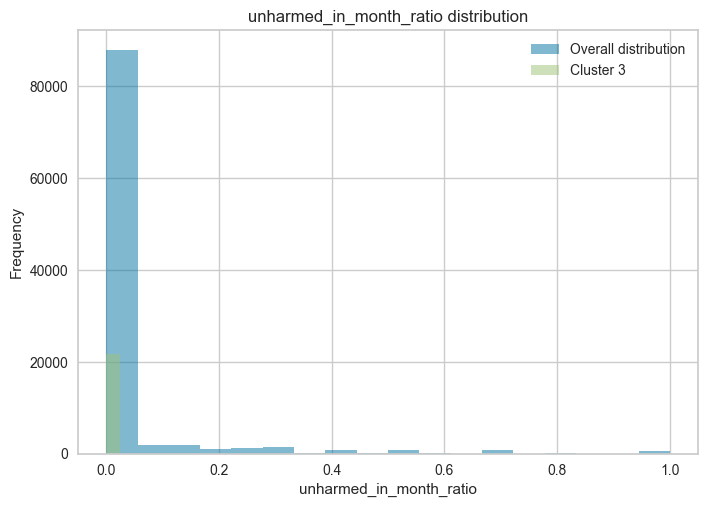

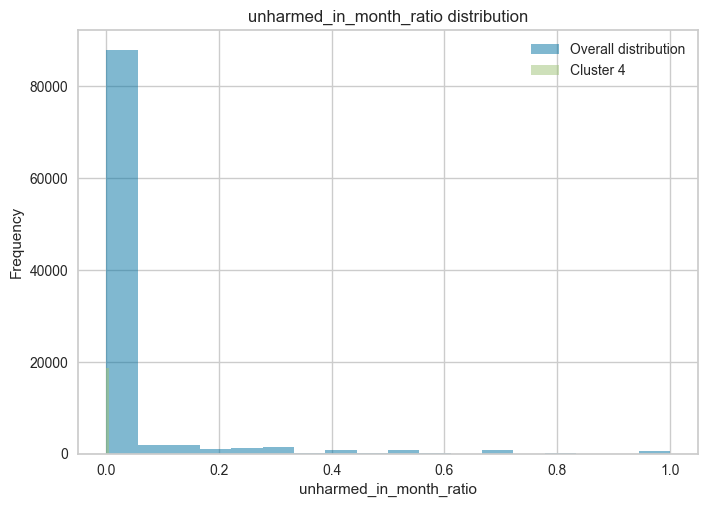

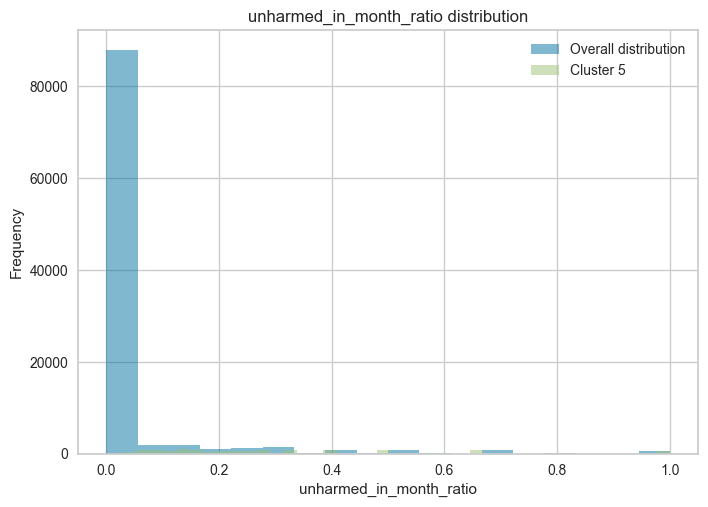

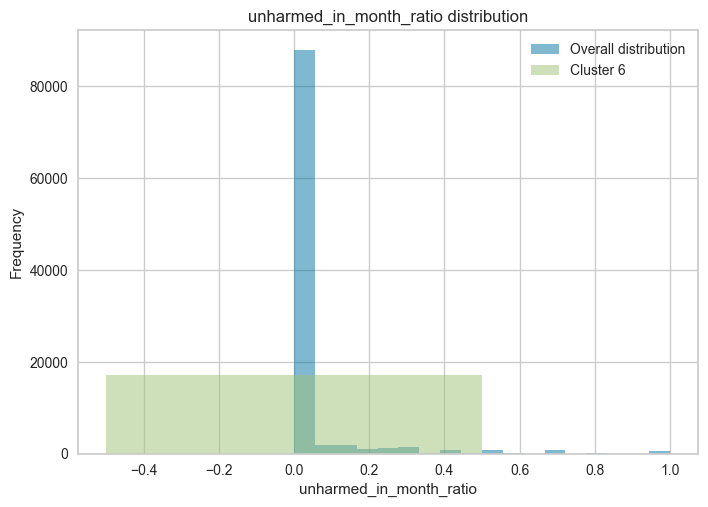

In [55]:
# Perform K-means clustering with the optimal k value
k_optimal2 = 6
kmeans_6 = KMeans(n_clusters=k_optimal2)
kmeans_6.fit(X_normalized_minmax)
labels2 = kmeans_6.labels_

# Analyze the obtained clusters by calculating summary statistics for each variable within each cluster
for k in range(k_optimal2):
    cluster_data = X_normalized_minmax[labels2 == k]
    print('Cluster', k + 1)
    for col in X_normalized_minmax.columns:
        print(f'\t{col}: {cluster_data[col].describe()}')

# Compare the distribution of variables within each cluster to the overall distribution of the variables in the entire dataset
for col in X_normalized_minmax.columns:
    all_data = X_normalized_minmax[col]
    for k in range(k_optimal2):
        cluster_data = X_normalized_minmax[labels2 == k][col]
        plt.hist(all_data, bins='auto', alpha=0.5, label='Overall distribution')
        plt.hist(cluster_data, bins='auto', alpha=0.5, label=f'Cluster {k + 1}')
        plt.title(f'{col} distribution')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()


In [56]:
# Calculate silhouette score
silhouette_score_val2 = silhouette_score(X_normalized_minmax, labels2)
print(f'Silhouette score: {silhouette_score_val2:.2f}')

# Calculate Calinski-Harabasz score
calinski_harabasz_score_val2 = calinski_harabasz_score(X_normalized_minmax, labels2)
print(f'Calinski-Harabasz score: {calinski_harabasz_score_val2:.2f}')

Silhouette score: 0.34
Calinski-Harabasz score: 32785.39
